In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

In [69]:
gt = pd.read_csv('/content/gas_turbines.csv')
gt

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

In [70]:
gt.drop(columns =['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'], inplace = True)

gt

AT      AP      AH     TEY
0      6.8594  1007.9  96.799  114.70
1      6.7850  1008.4  97.118  114.72
2      6.8977  1008.8  95.939  114.71
3      7.0569  1009.2  95.249  114.72
4      7.3978  1009.7  95.150  114.72
...       ...     ...     ...     ...
15034  9.0301  1005.6  98.460  111.61
15035  7.8879  1005.9  99.093  111.78
15036  7.2647  1006.3  99.496  110.19
15037  7.0060  1006.8  99.008  110.74
15038  6.9279  1007.2  97.533  111.58

[15039 rows x 4 columns]

In [71]:
gt_nrow = gt.shape[0]

In [72]:
def lost_record():

    gt_nrow_now = gt.shape[0]
    lost = gt_nrow - gt_nrow_now
    lost = (lost/gt_nrow)*100
    lost = round(lost, 2)

    return print('We lost ' + str(lost) + ' % data')

# Performing EDA In Dataset
Applying Descriptive Statistics

In [73]:
gt.describe()

AT           AP            AH           TEY
count  15039.000000  15039.00000  15039.000000  15039.000000
mean      17.764381   1013.19924     79.124174    134.188464
std        7.574323      6.41076     13.793439     15.829717
min        0.522300    985.85000     30.344000    100.170000
25%       11.408000   1008.90000     69.750000    127.985000
50%       18.186000   1012.80000     82.266000    133.780000
75%       23.862500   1016.90000     90.043500    140.895000
max       34.929000   1034.20000    100.200000    174.610000

In [74]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [75]:
gt.isna().sum()

AT     0
AP     0
AH     0
TEY    0
dtype: int64

In [76]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
              str(len(df[df.columns[i]].unique())))

In [77]:
uni(gt)


 All Unique Value in AT
[ 0.5223   0.58759  0.60394 ... 34.831   34.903   34.929  ]
Total no of unique values 12086

 All Unique Value in AP
[ 985.85  986.16  986.25  986.41  986.43  986.56  986.78  986.87  987.31
  987.43  987.5   987.56  987.84  988.11  988.2   988.21  988.34  988.5
  988.63  988.65  988.82  988.87  988.97  989.32  989.67  989.93  990.22
  990.28  990.87  991.01  991.17  991.25  991.73  992.37  992.42  992.89
  993.01  993.23  993.3   993.39  993.42  993.51  993.55  993.59  993.76
  993.9   993.93  993.97  994.1   994.12  994.17  994.19  994.25  994.31
  994.37  994.5   994.6   994.7   994.75  994.76  994.89  994.95  995.
  995.14  995.23  995.25  995.28  995.4   995.63  995.66  995.74  995.76
  995.78  995.79  995.84  995.87  995.92  995.95  995.96  996.01  996.02
  996.16  996.17  996.23  996.26  996.28  996.29  996.3   996.34  996.35
  996.37  996.47  996.52  996.55  996.62  996.66  996.73  996.84  996.89
  996.91  996.94  996.96  997.04  997.23  997.27  997.33  


# Checking for Duplicated Values

In [78]:
gt[gt.duplicated()]

Empty DataFrame
Columns: [AT, AP, AH, TEY]
Index: []

There is no duplicate vale in are dataset
# Visualizing The Data
**Ploting Boxplot**

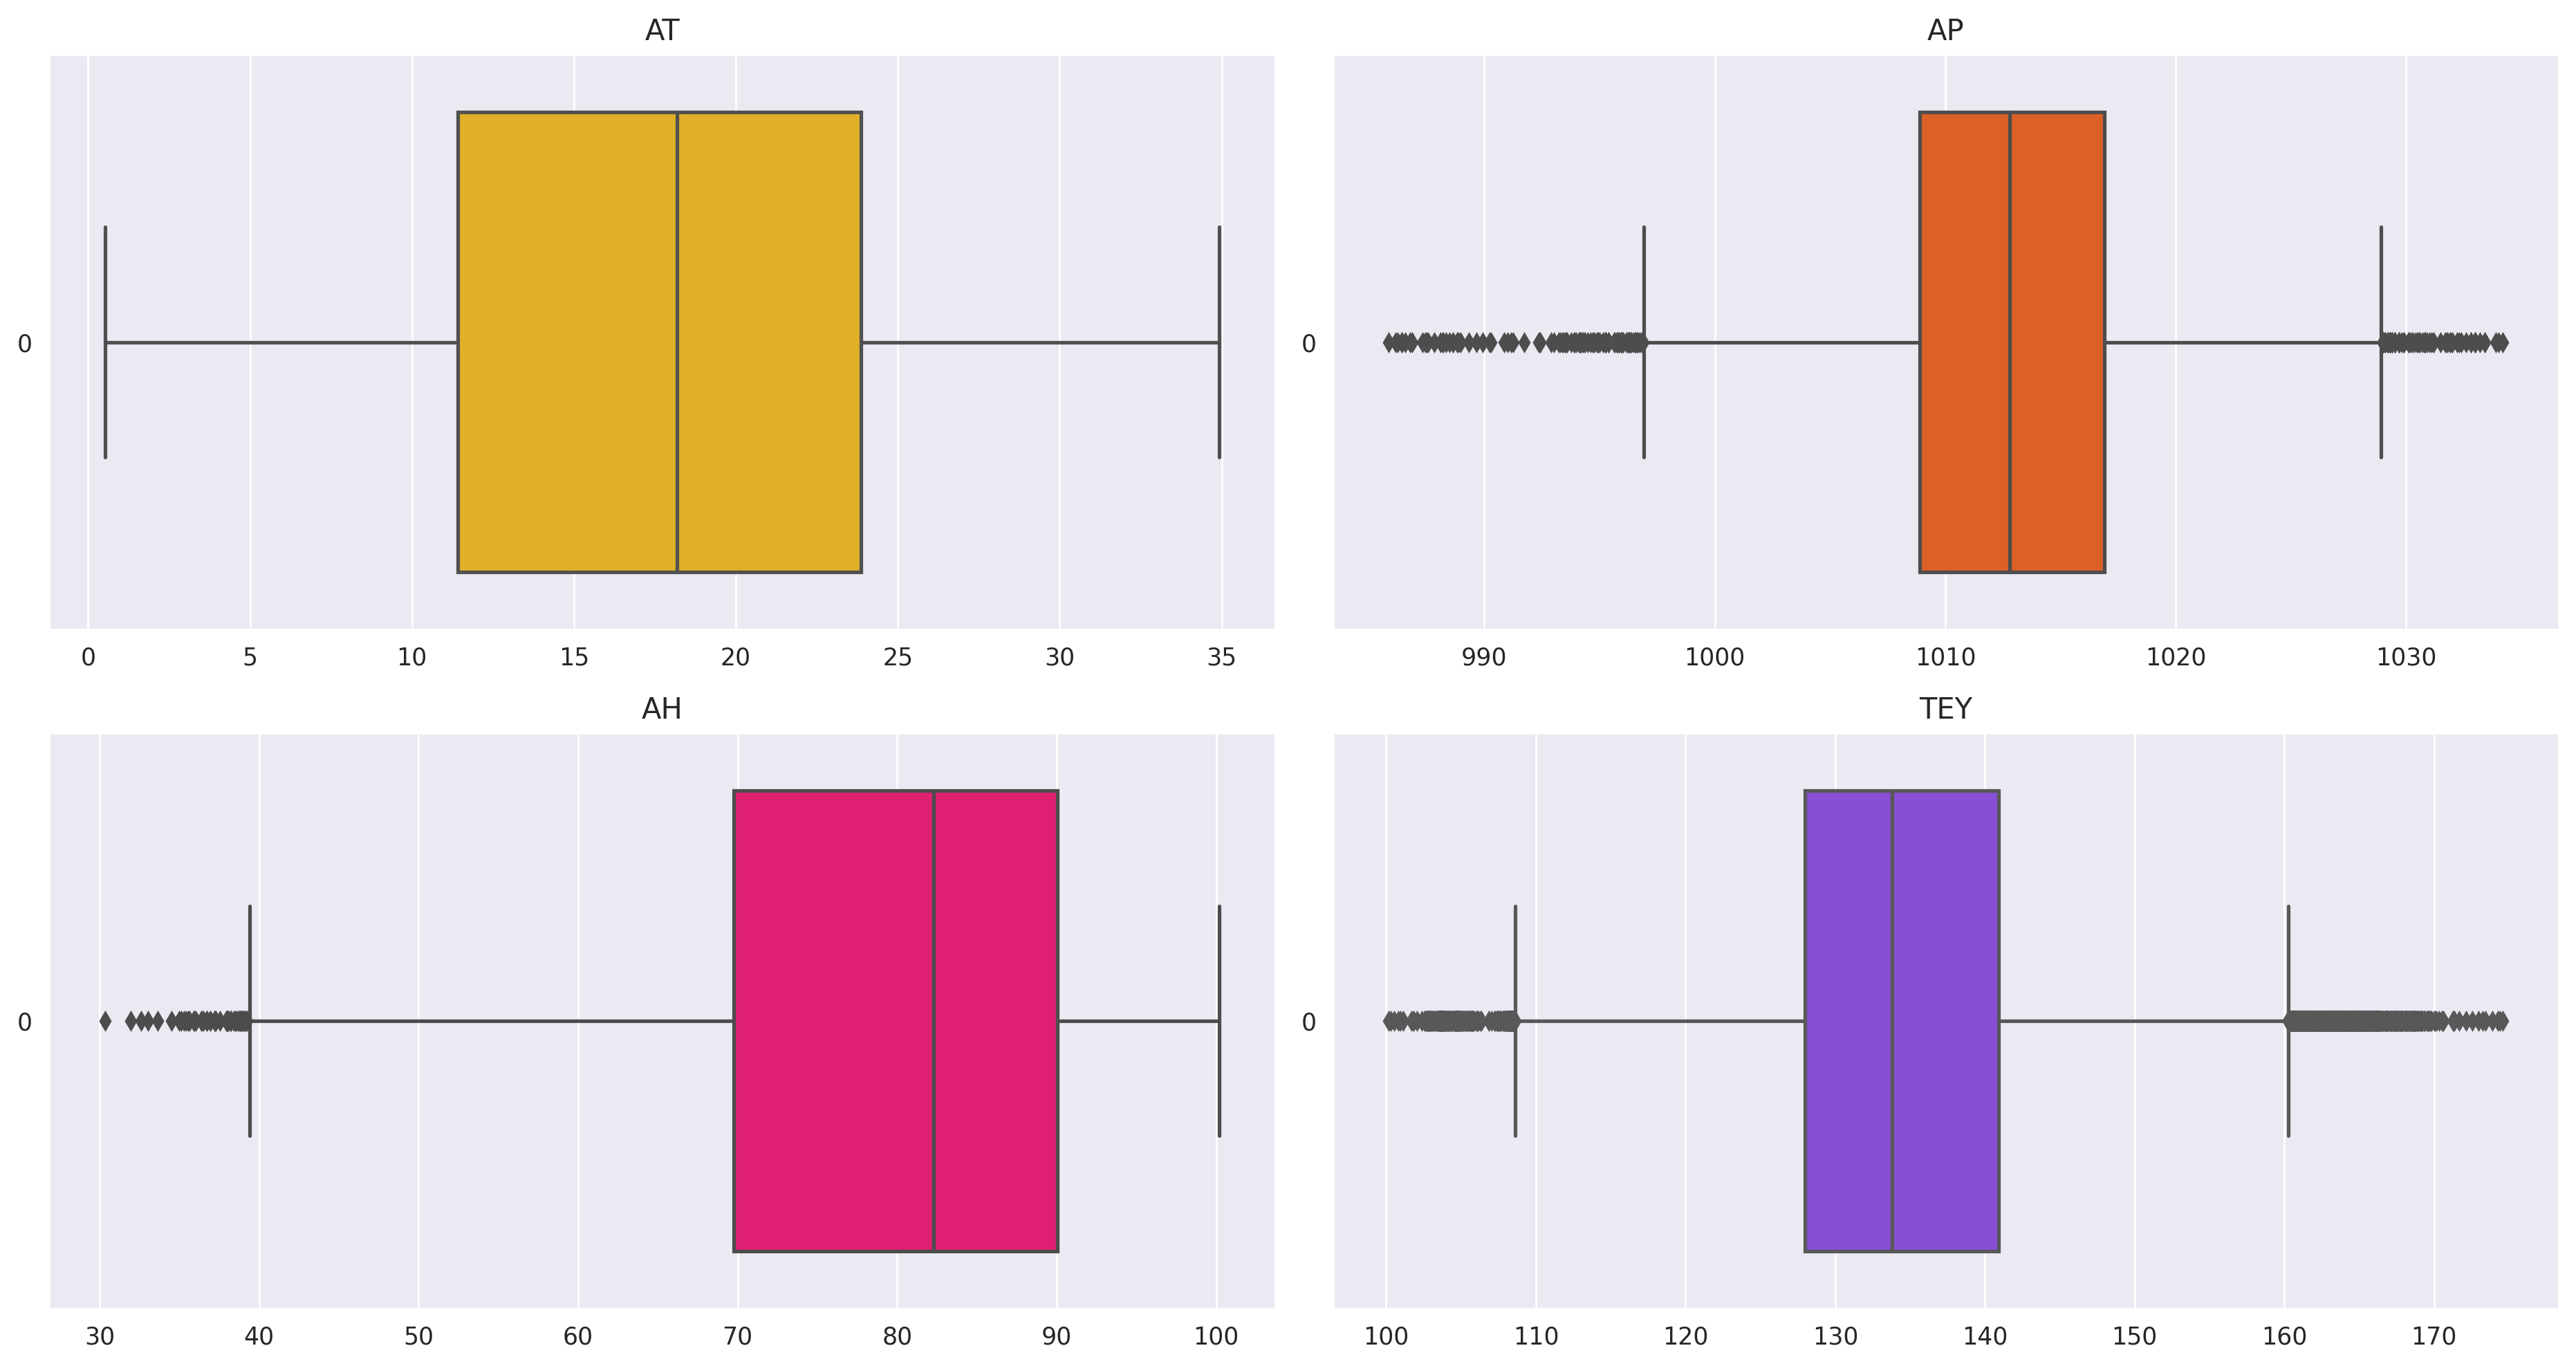

In [79]:
fig,ax = plt.subplots(2, 2)

ax[0, 0].title.set_text('AT')
sns.boxplot(gt['AT'], ax = ax[0, 0], palette = ['#ffbe0b'], orient = 'h')

ax[0, 1].title.set_text('AP')
sns.boxplot(gt['AP'], ax = ax[0, 1], palette = ['#fb5607'], orient = 'h')

ax[1, 0].title.set_text('AH')
sns.boxplot(gt['AH'], ax = ax[1, 0], palette = ['#ff006e'], orient = 'h')

ax[1, 1].title.set_text('TEY')
sns.boxplot(gt['TEY'], ax = ax[1, 1], palette = ['#8338ec'], orient = 'h')

plt.tight_layout()

**Ploting Distplot**

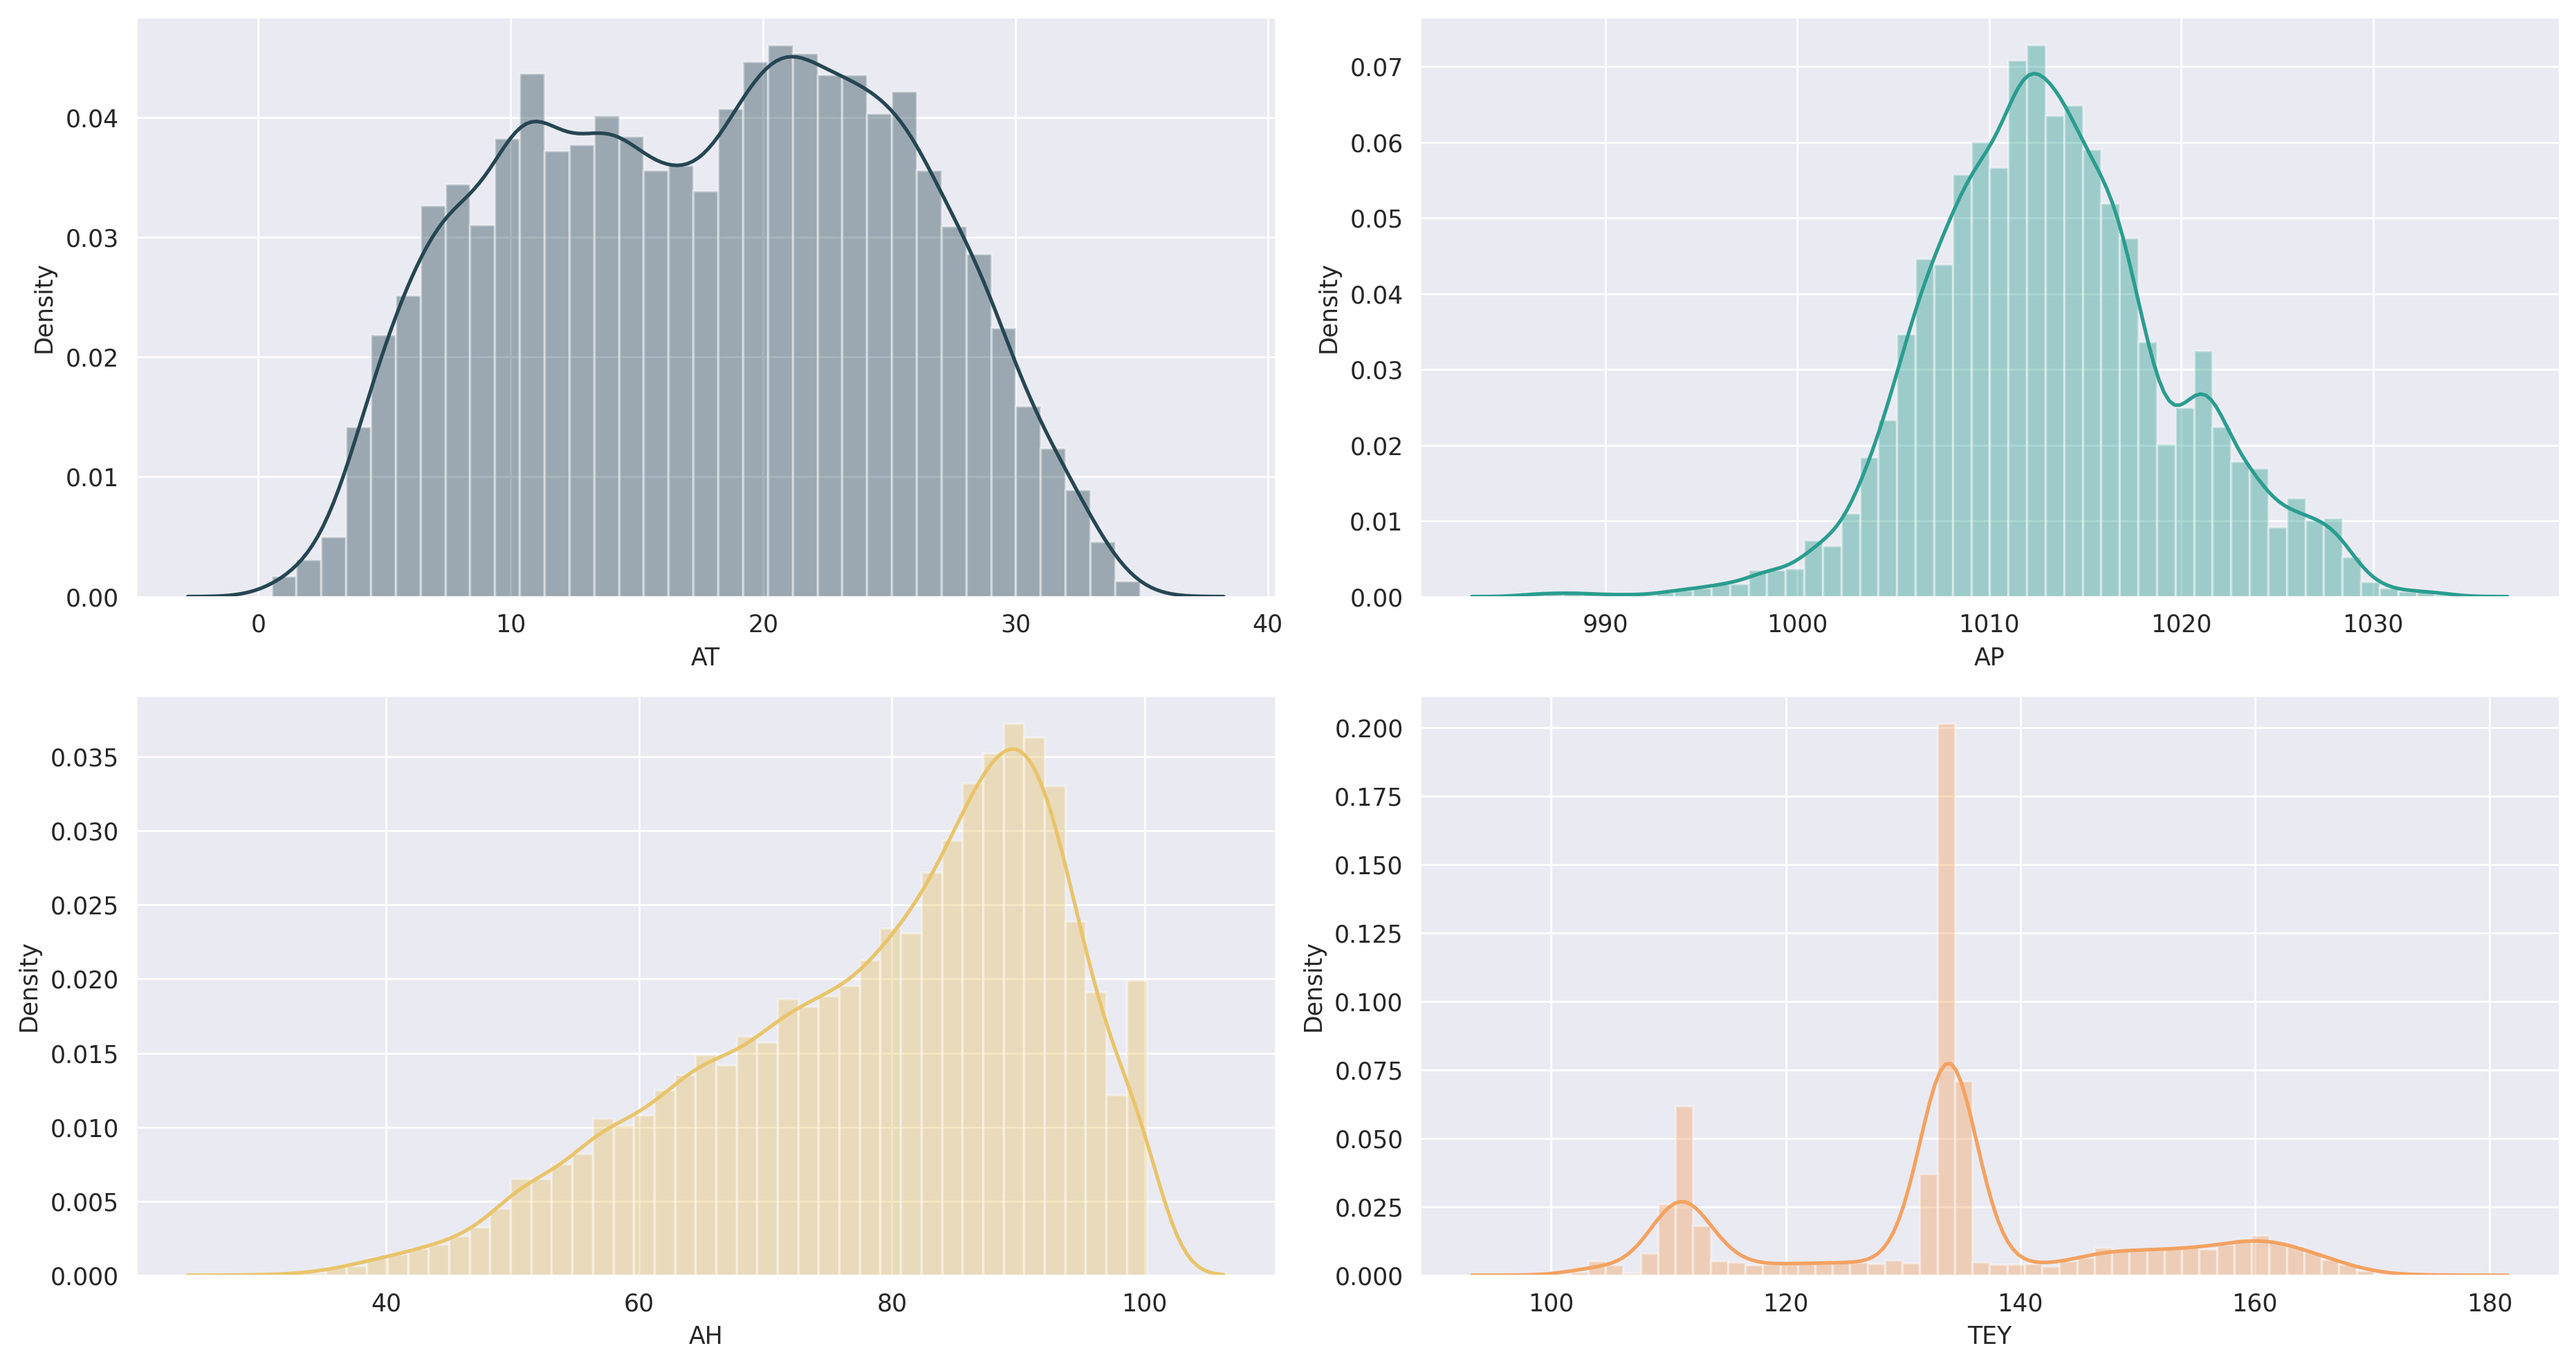

In [80]:
fig,ax = plt.subplots(2, 2)


sns.distplot(gt['AT'], ax = ax[0, 0], color = '#264653')


sns.distplot(gt['AP'], ax = ax[0, 1], color = '#2a9d8f')


sns.distplot(gt['AH'], ax = ax[1, 0], color = '#e9c46a')


sns.distplot(gt['TEY'], ax = ax[1, 1], color = '#f4a261')

plt.tight_layout()

**Ploting QQ-Plot**

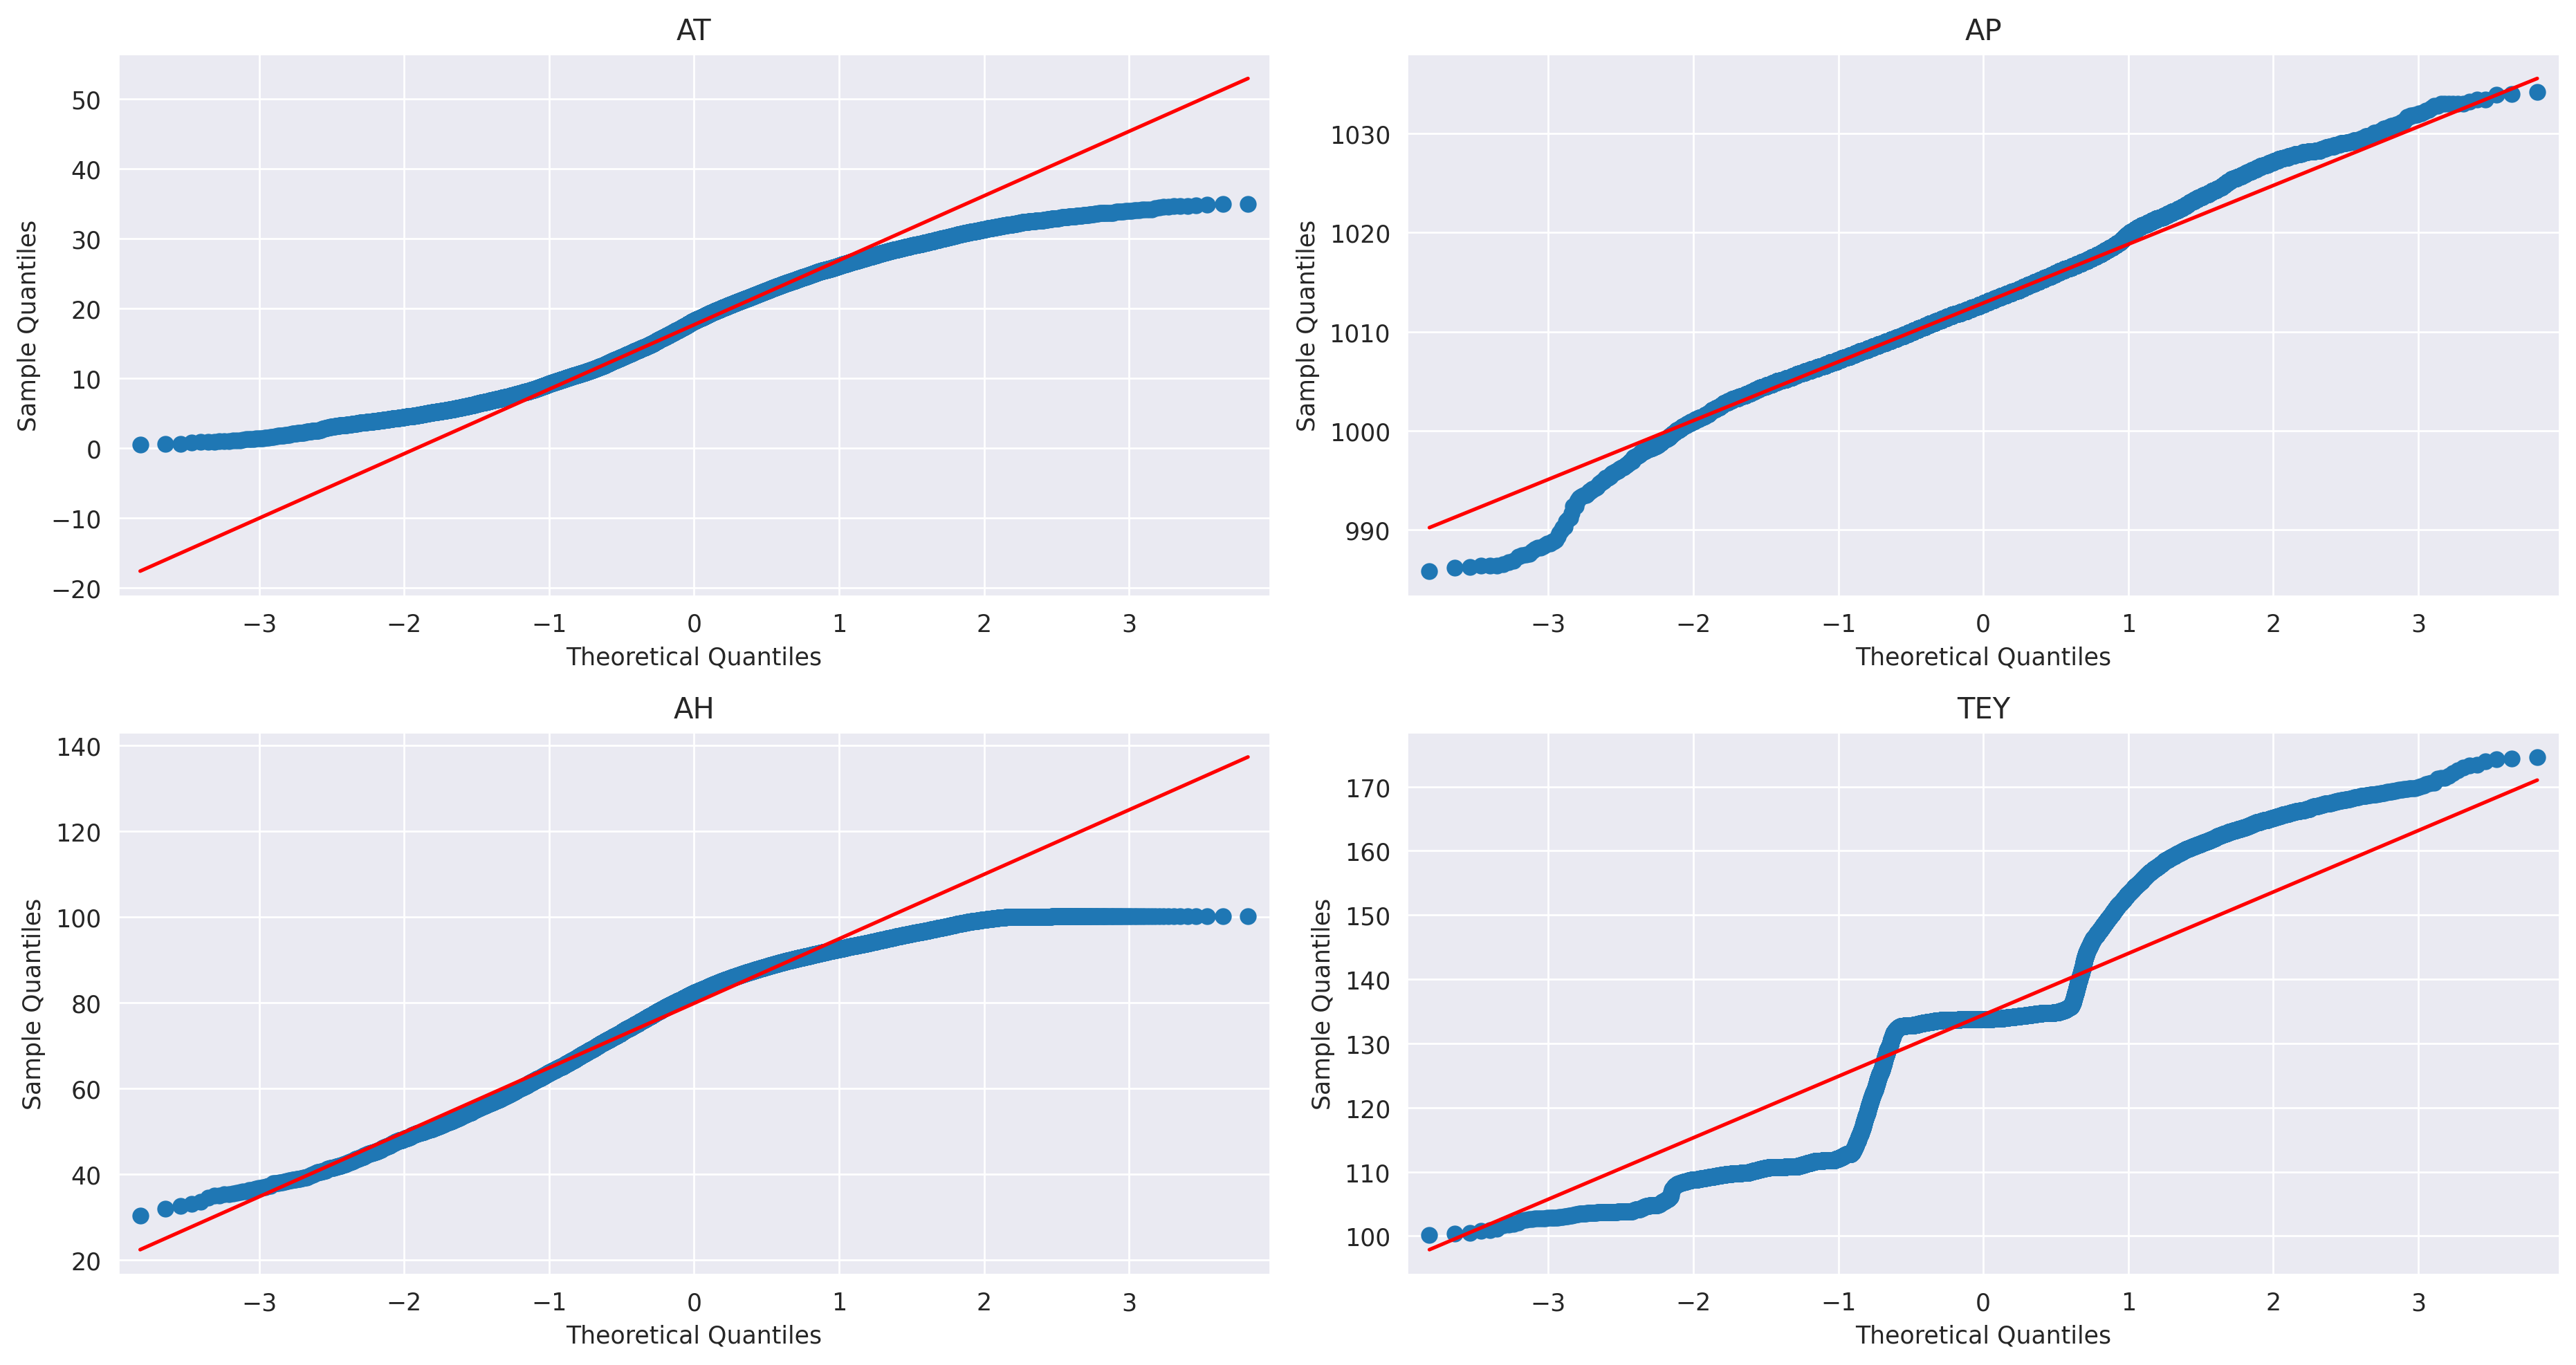

In [81]:
fig,ax = plt.subplots(2, 2)

ax[0, 0].title.set_text('AT')
sm.qqplot(gt['AT'], ax = ax[0, 0], line = 'q')

ax[0, 1].title.set_text('AP')
sm.qqplot(gt['AP'], ax = ax[0, 1], line = 'q')

ax[1, 0].title.set_text('AH')
sm.qqplot(gt['AH'], ax = ax[1, 0], line = 'q')

ax[1, 1].title.set_text('TEY')
sm.qqplot(gt['TEY'], ax = ax[1, 1], line = 'q')

plt.tight_layout()

# Correlation Analysis

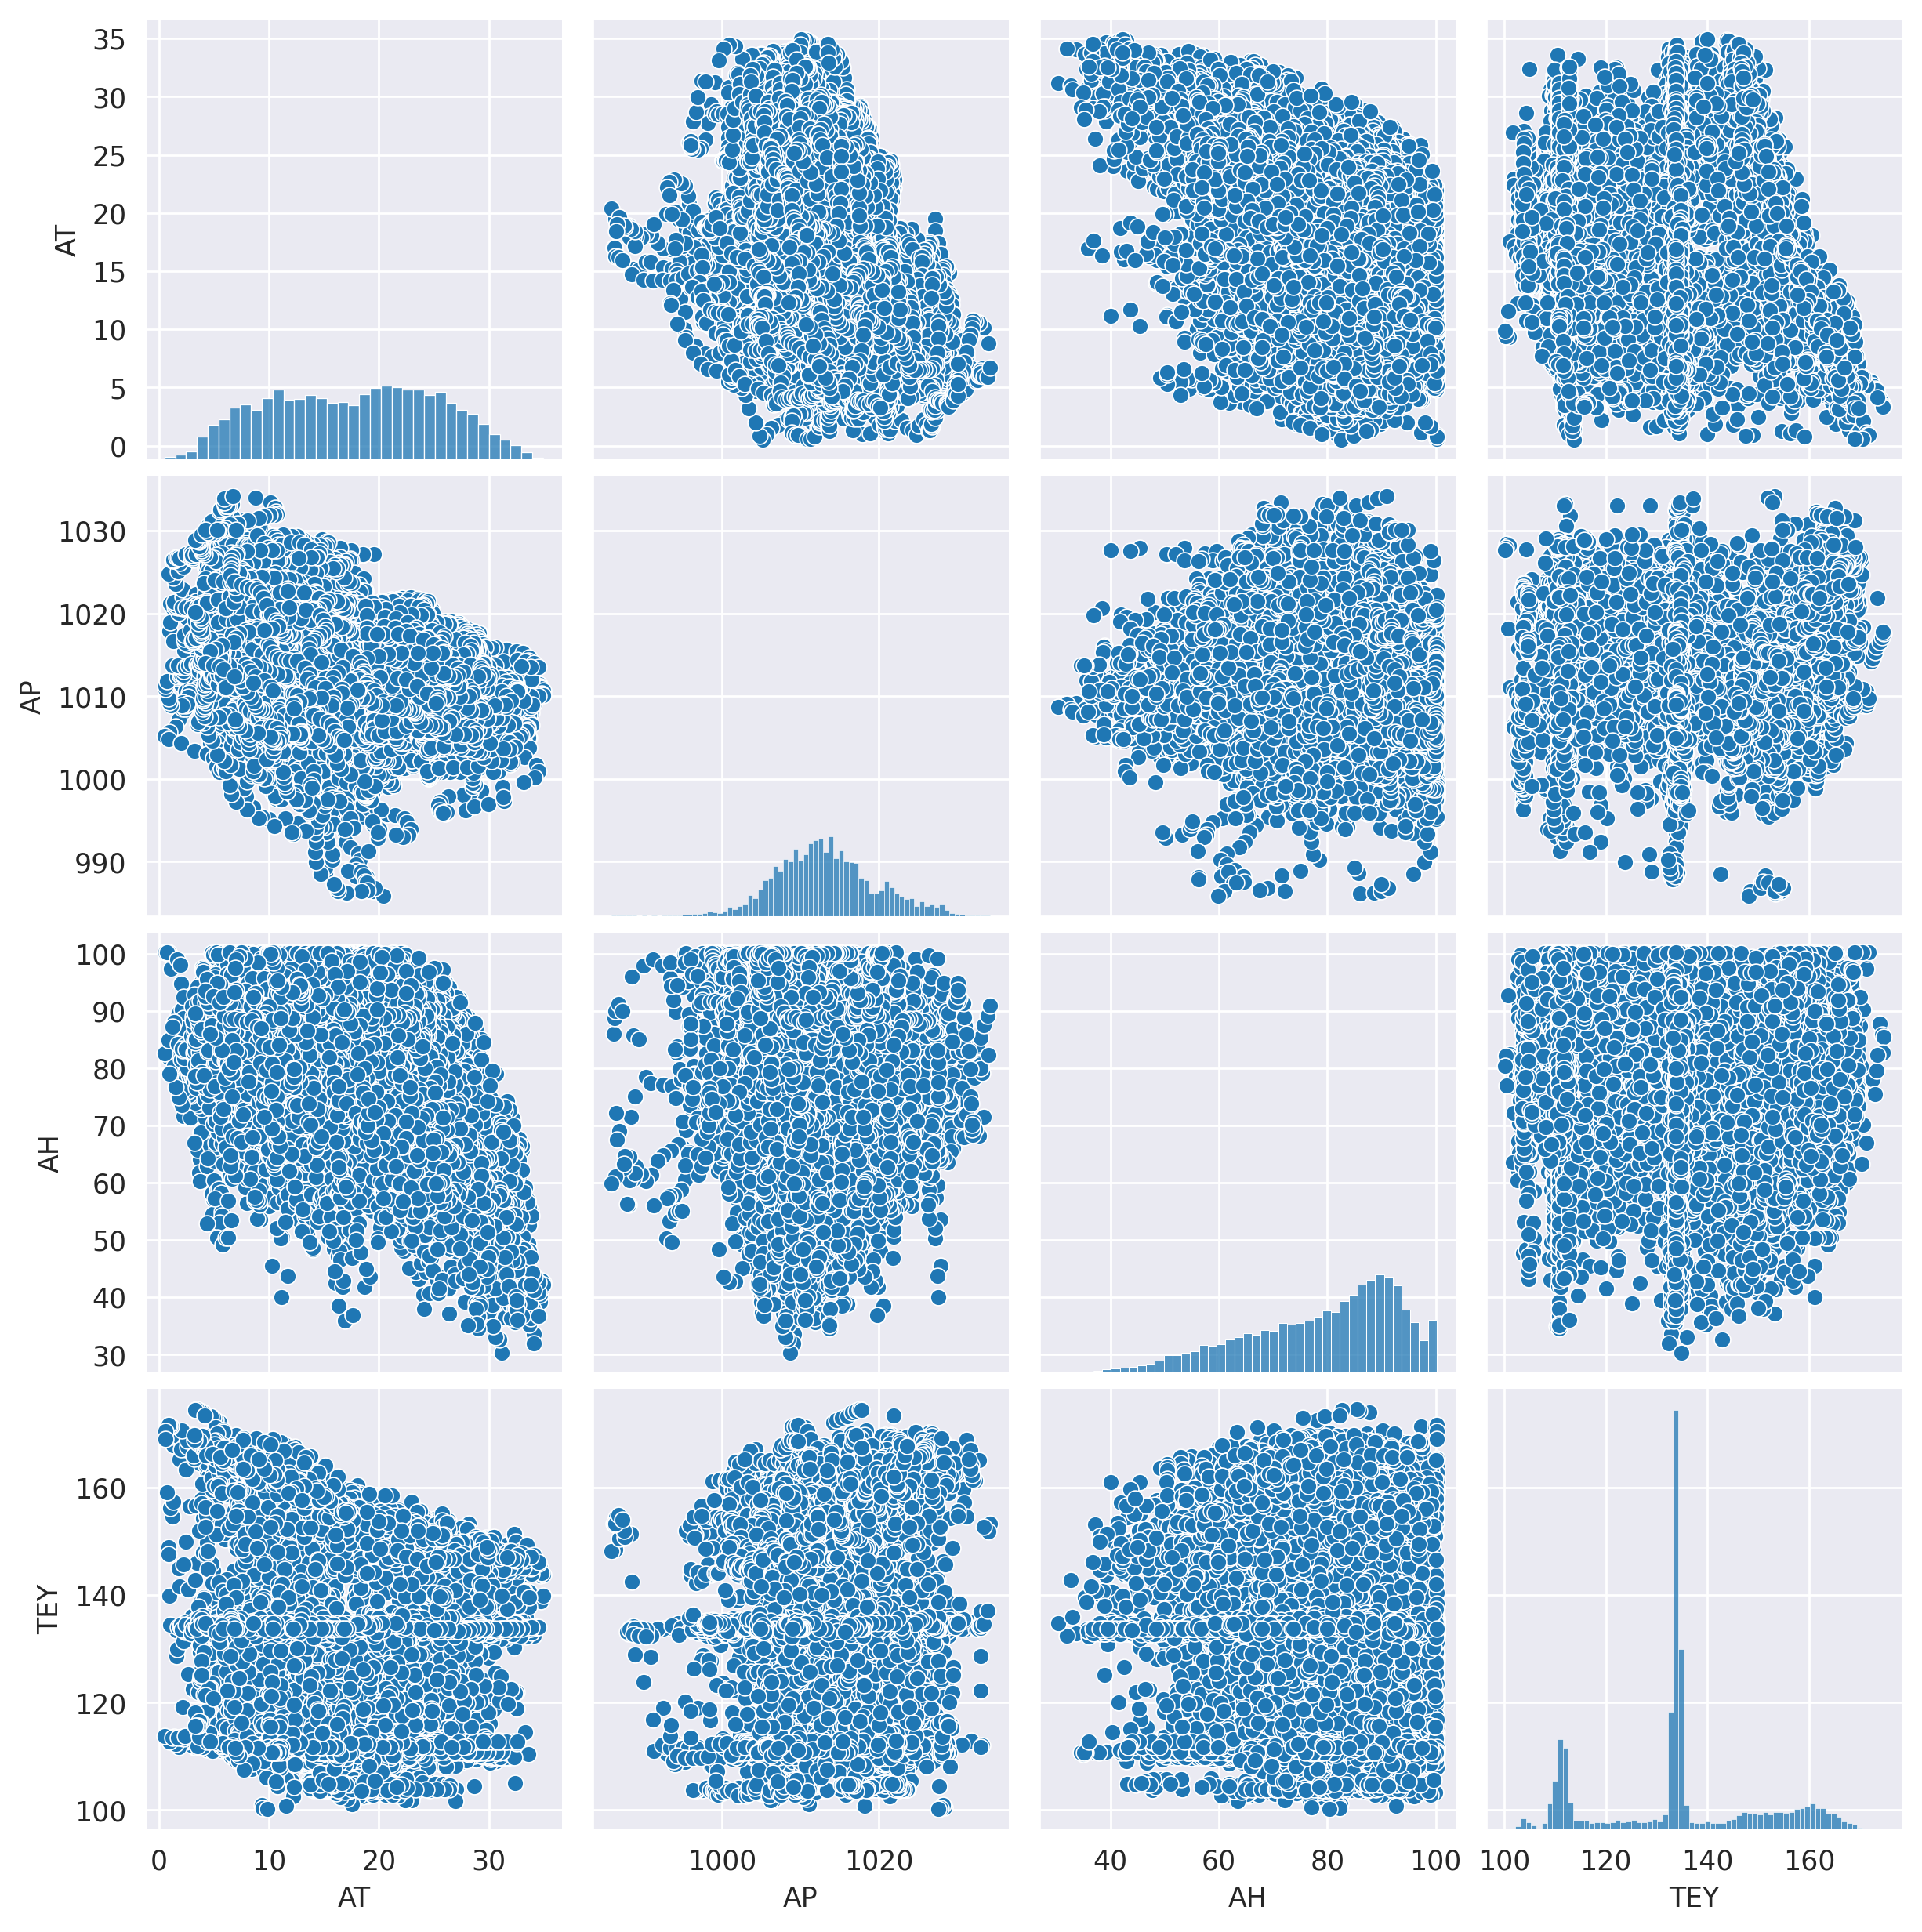

In [82]:
sns.pairplot(gt)

plt.show()

<Axes: >

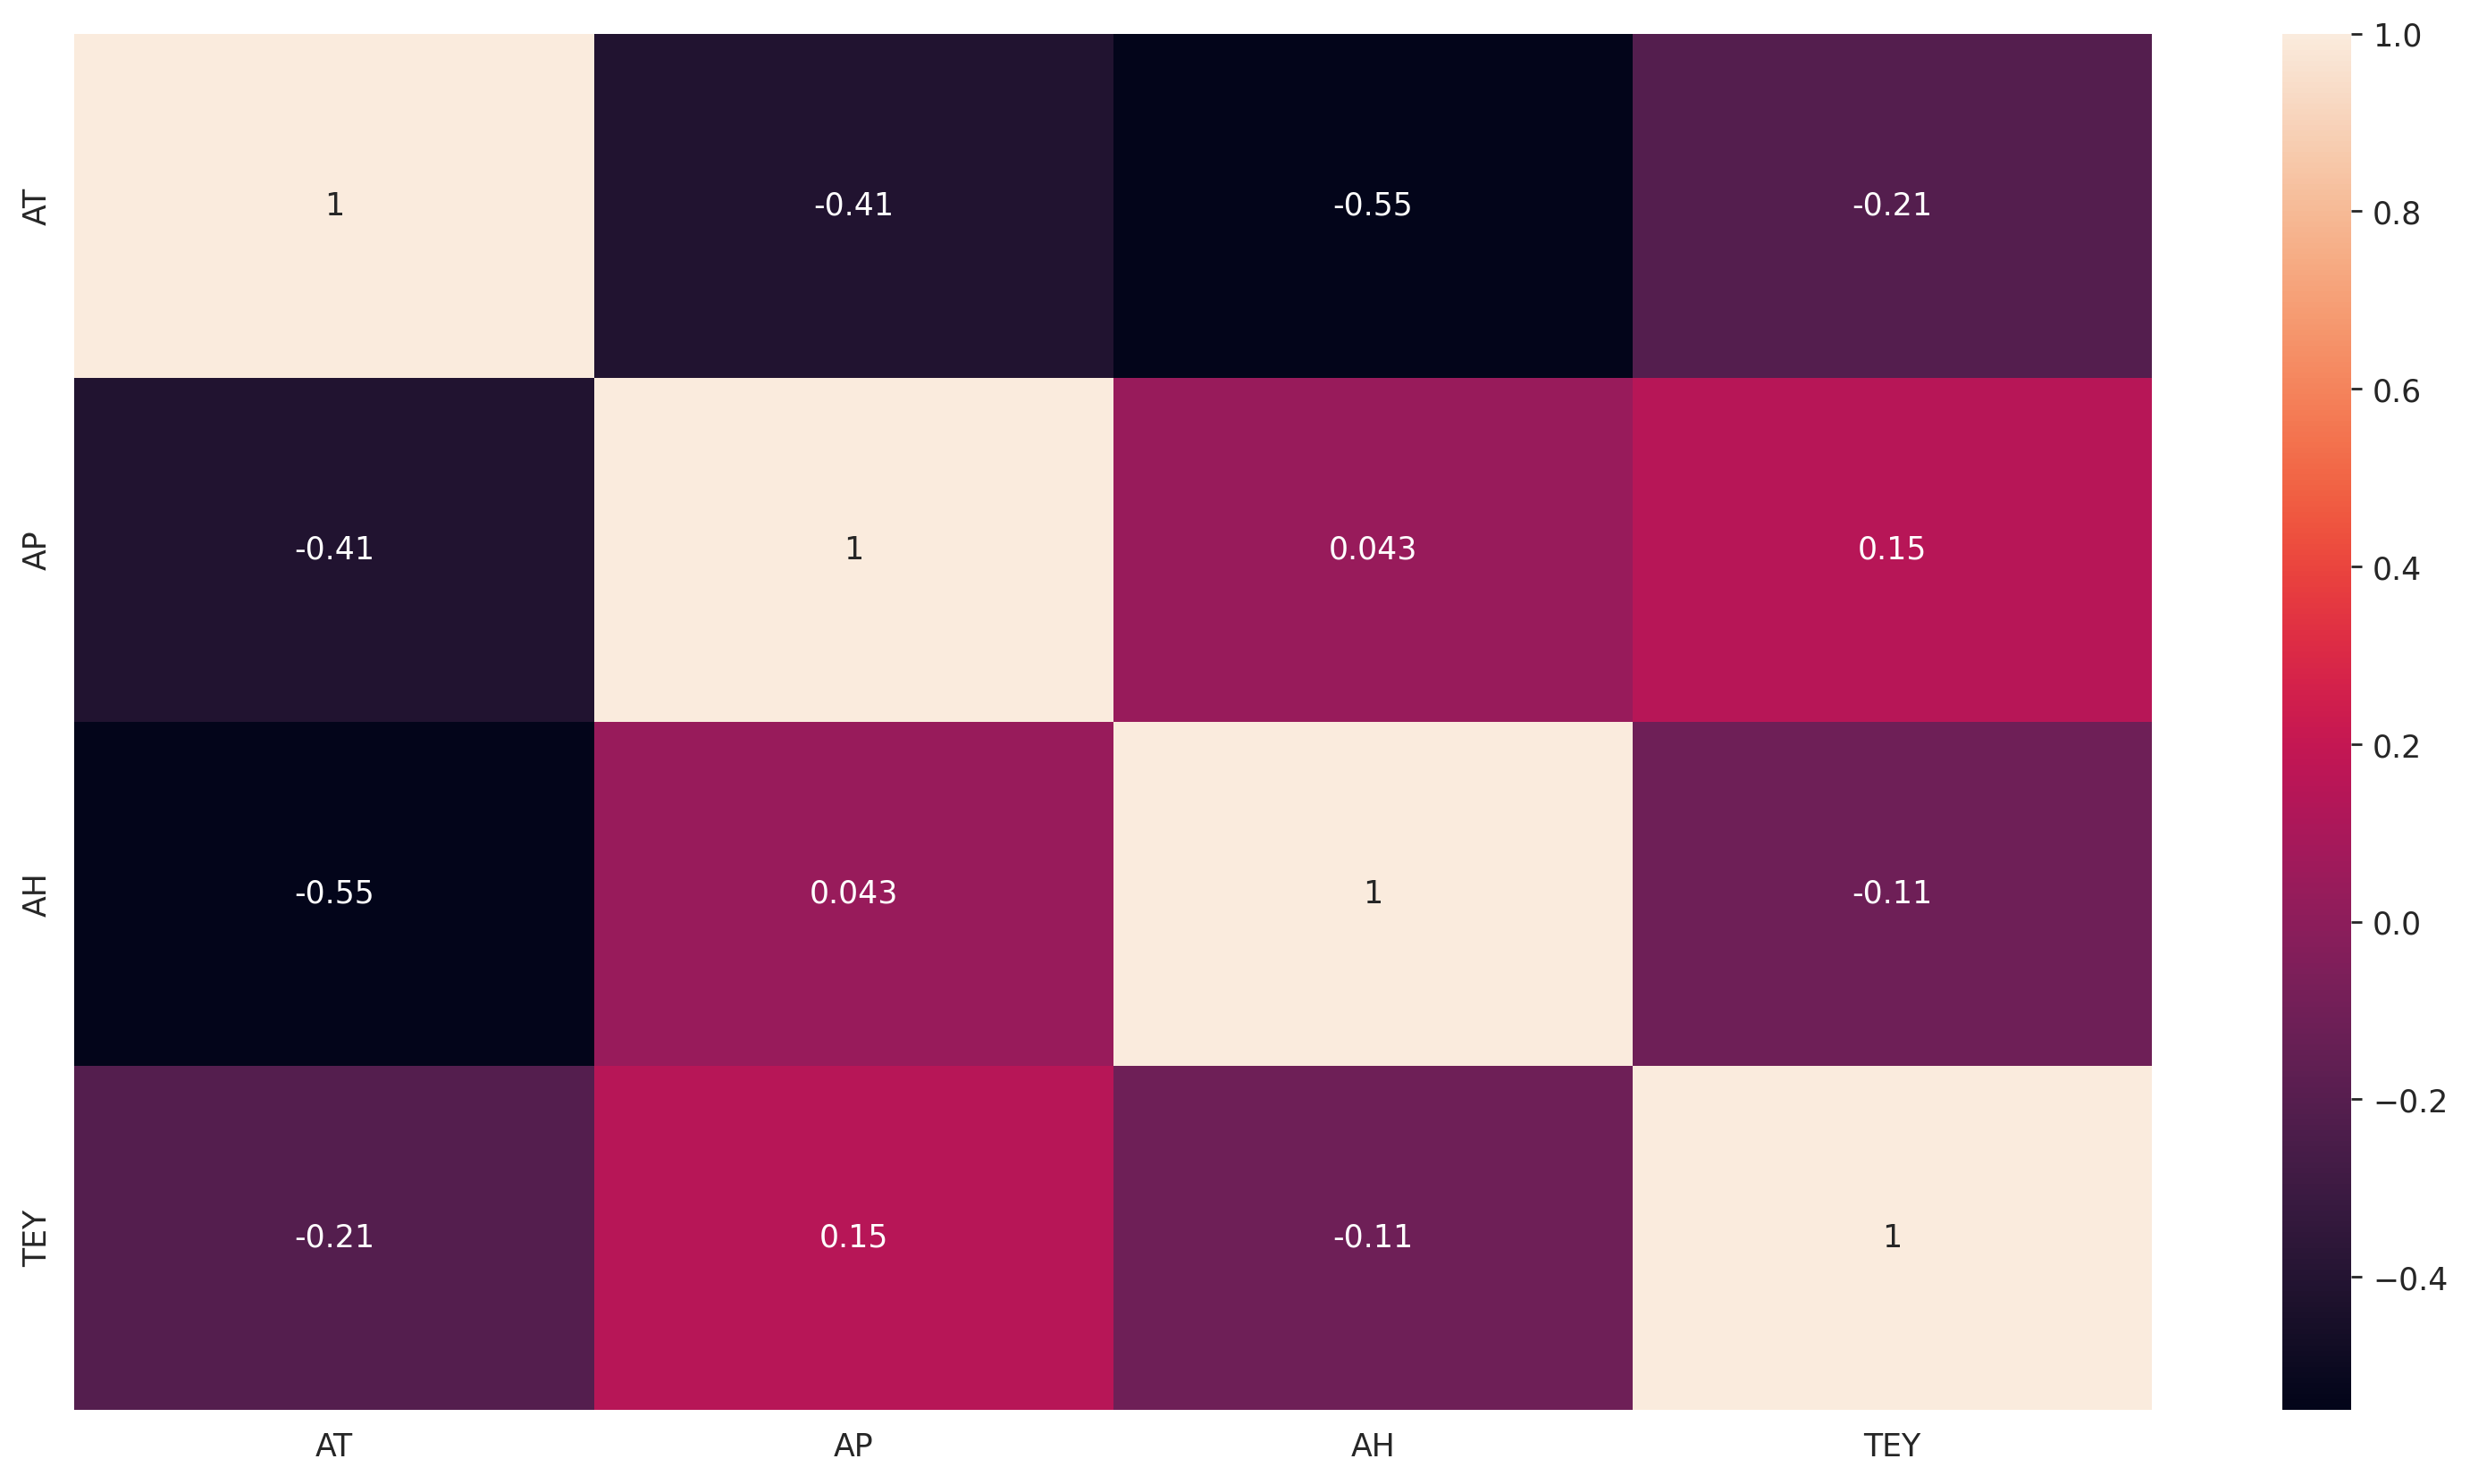

In [83]:
sns.heatmap(gt.corr(), annot = True)

# Outlier Detection

In [84]:
def outlier_percentage(df):
    for i in range(len(df.columns)):

        q1 = df[df.columns[i]].quantile(0.25)
        q3 = df[df.columns[i]].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[df.columns[i]] > upper])) +
                      (len(df[df[df.columns[i]] < lower])))/len(df[df.columns[i]]))*100

        print(str(df.columns[i]) + ' : ' + str(percentage) + ' %')

In [85]:
def replace_outlier_extream(st, col):

    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st[col].mask(st[col] > upper, upper, inplace=True)
    st[col].mask(st[col] < lower, lower, inplace=True)

In [86]:
def remove_outlier(st, col):
    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)

    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st = st[(st[col] > lower) & (st[col] < upper)]

    return st

# Outlier Percentage (Before)

In [87]:
outlier_percentage(gt)

AT : 0.0 %
AP : 1.4229669525899329 %
AH : 0.37236518385530953 %
TEY : 10.08710685550901 %


we dont remove outlier in target column.
# Splitting The Data Into Target and Independent set

In [88]:
x = gt.iloc[:,:-1]
y = gt['TEY']

In [89]:
x

AT      AP      AH
0      6.8594  1007.9  96.799
1      6.7850  1008.4  97.118
2      6.8977  1008.8  95.939
3      7.0569  1009.2  95.249
4      7.3978  1009.7  95.150
...       ...     ...     ...
15034  9.0301  1005.6  98.460
15035  7.8879  1005.9  99.093
15036  7.2647  1006.3  99.496
15037  7.0060  1006.8  99.008
15038  6.9279  1007.2  97.533

[15039 rows x 3 columns]

# Normalizing The Dataset

In [90]:
sc = StandardScaler()
scaled_x = pd.DataFrame(sc.fit_transform(x),columns =x.columns)

scaled_x

AT        AP        AH
0     -1.439778 -0.826644  1.281436
1     -1.449601 -0.748647  1.304564
2     -1.434721 -0.686250  1.219086
3     -1.413702 -0.623853  1.169060
4     -1.368693 -0.545857  1.161883
...         ...       ...       ...
15034 -1.153182 -1.185428  1.401860
15035 -1.303986 -1.138630  1.447753
15036 -1.386267 -1.076233  1.476971
15037 -1.420423 -0.998236  1.441590
15038 -1.430734 -0.935839  1.334652

[15039 rows x 3 columns]

# Splitting The Data Into Training And Testing Set
# New Section

In [91]:
xtrain,xtest,ytrain,ytest = train_test_split(scaled_x,y,train_size=0.75,random_state=1)

In [92]:
xtrain

AT        AP        AH
8033  -1.214338  0.452498  0.951776
6802  -1.051400  1.294860  0.572670
11267  0.230737  0.733285  1.248231
5411  -0.154657  0.343303  0.421869
13194  0.769285 -0.218272  0.674968
...         ...       ...       ...
905   -1.811256  1.326058  0.135129
5192   0.640952 -0.748647 -0.064901
12172  1.728346 -1.060633 -1.773306
235   -1.375374  0.951675 -0.112606
13349  0.513808  0.109314  0.897038

[11279 rows x 3 columns]

# Preparing Model From The Dataset
Creating Default Model With ANN
# Creating ann_def Model

In [93]:
ann_def = Sequential()

# Creating Hidden Layer

In [94]:
ann_def.add(Dense(units=30,activation = 'linear'))
ann_def.add(Dense(units=20,activation='relu'))

# Creating Output Layer

In [95]:
ann_def.add(Dense(units=1))

# Connecting All Neurons In Each Layer

In [96]:
ann_def.compile(optimizer='adam', loss='mse')

# Fitting Data

In [97]:
ann_def.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 50)

Epoch 1/50
353/353 [==============================] - 2s 2ms/step - loss: 13846.2246 - val_loss: 6568.3228
Epoch 2/50
353/353 [==============================] - 1s 3ms/step - loss: 3932.4060 - val_loss: 1940.0029
Epoch 3/50
353/353 [==============================] - 1s 3ms/step - loss: 721.5046 - val_loss: 272.2130
Epoch 4/50
353/353 [==============================] - 1s 3ms/step - loss: 231.0089 - val_loss: 233.8372
Epoch 5/50
353/353 [==============================] - 1s 2ms/step - loss: 220.2421 - val_loss: 229.3409
Epoch 6/50
353/353 [==============================] - 1s 2ms/step - loss: 218.2527 - val_loss: 227.3580
Epoch 7/50
353/353 [==============================] - 1s 2ms/step - loss: 217.8212 - val_loss: 225.8866
Epoch 8/50
353/353 [==============================] - 1s 2ms/step - loss: 217.2064 - val_loss: 226.0629
Epoch 9/50
353/353 [==============================] - 1s 2ms/step - loss: 216.5159 - val_loss: 224.7702
Epoch 10/50
353/353 [==============================] - 1s 2

# Evaluating The Model
**Ploting Line-Plot**

Text(0.5, 0, 'No Of Epochs')

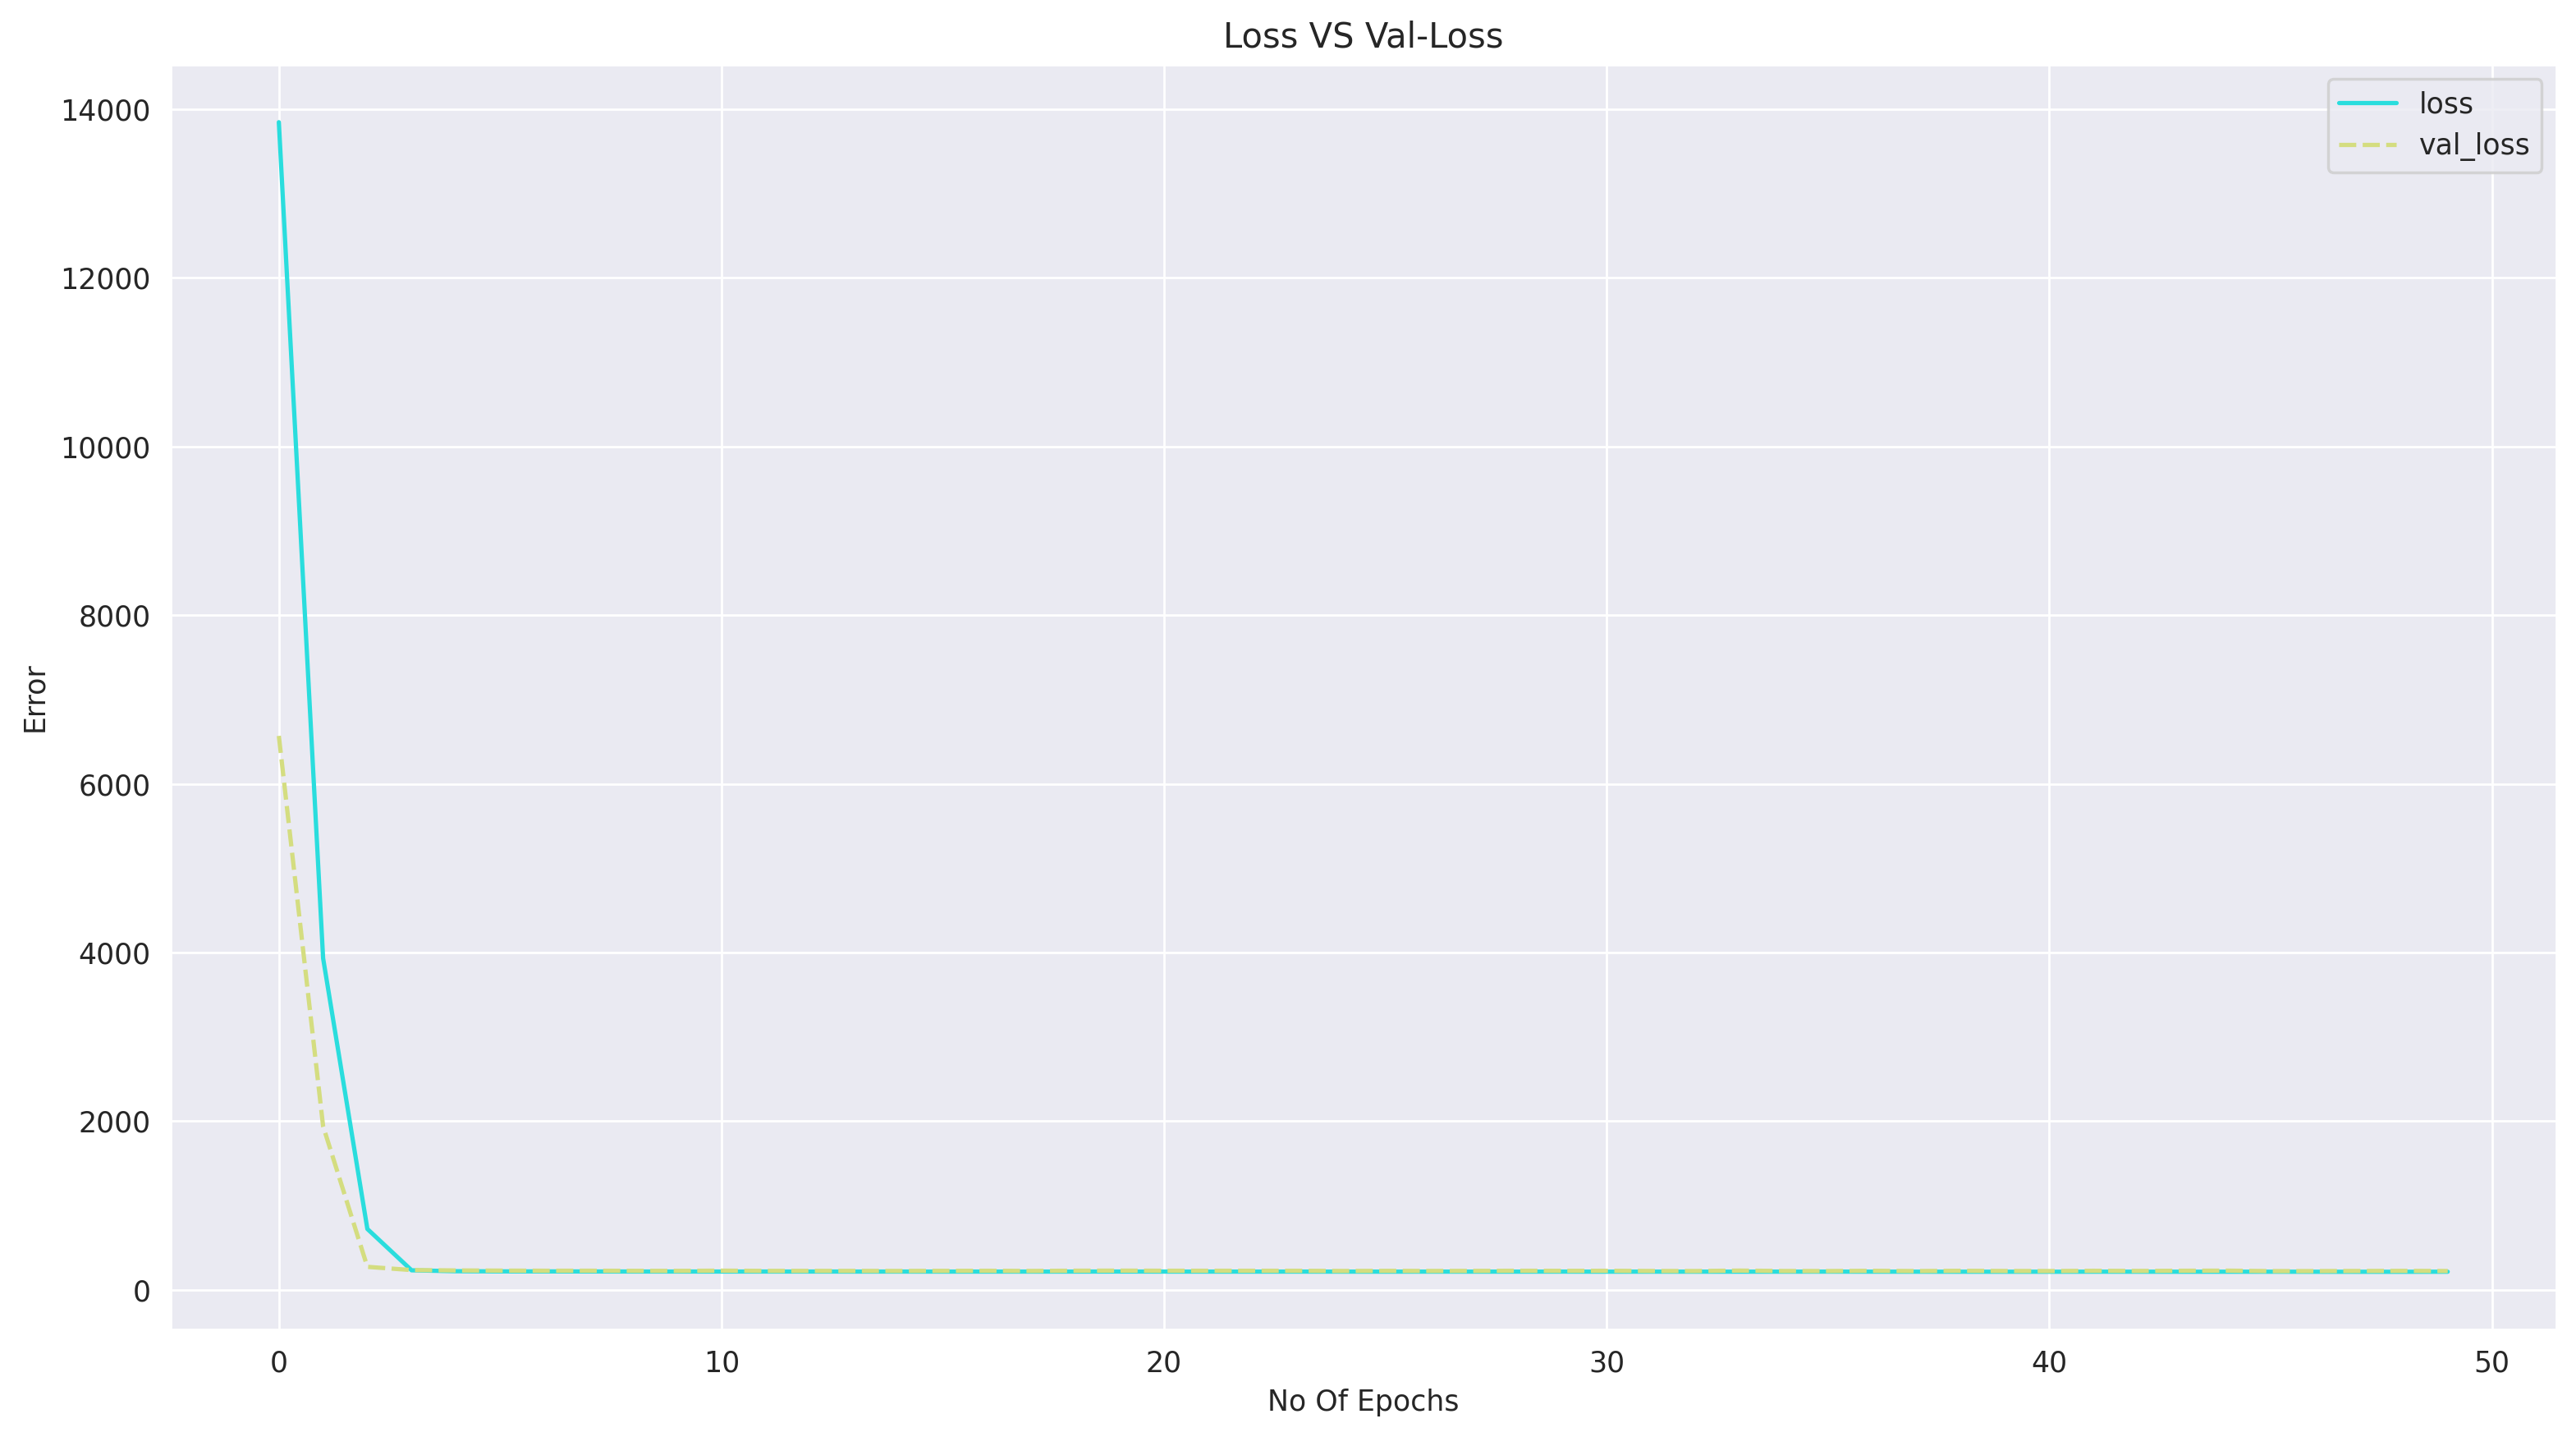

In [98]:
val_loss_def = pd.DataFrame(ann_def.history.history)

sns.lineplot(data = val_loss_def, palette='rainbow')
plt.title('Loss VS Val-Loss')
plt.ylabel('Error')
plt.xlabel('No Of Epochs')

# Creating Model With Early Stopping
Creating ann Model

In [99]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [100]:
ann_es = Sequential()

# Creating Hidden Layer

In [101]:
ann_es.add(Dense(units=30, activation='linear'))
ann_es.add(Dense(units=20, activation='relu'))

# Creating Output Layer

In [102]:
ann_es.add(Dense(units=1))

# Connecting All Neurons In Each Layer

In [103]:
ann_es.compile(optimizer='adam', loss='mse')


# Fitting Data

In [104]:
ann_es.fit(xtrain, ytrain, validation_data = (xtest, ytest), callbacks=[early] , epochs=100)

Epoch 1/100
353/353 [==============================] - 2s 2ms/step - loss: 14827.7090 - val_loss: 8014.8281
Epoch 2/100
353/353 [==============================] - 1s 2ms/step - loss: 3951.0298 - val_loss: 340.1976
Epoch 3/100
353/353 [==============================] - 1s 2ms/step - loss: 257.3272 - val_loss: 233.4367
Epoch 4/100
353/353 [==============================] - 1s 3ms/step - loss: 221.9548 - val_loss: 228.1727
Epoch 5/100
353/353 [==============================] - 1s 2ms/step - loss: 219.5834 - val_loss: 226.9877
Epoch 6/100
353/353 [==============================] - 1s 2ms/step - loss: 218.4237 - val_loss: 226.4927
Epoch 7/100
353/353 [==============================] - 1s 2ms/step - loss: 217.6408 - val_loss: 225.8665
Epoch 8/100
353/353 [==============================] - 1s 2ms/step - loss: 217.2310 - val_loss: 227.2589
Epoch 9/100
353/353 [==============================] - 1s 3ms/step - loss: 216.9691 - val_loss: 226.2175
Epoch 10/100
353/353 [=============================

# Evaluating The Model
**Ploting Line-Plot**





Text(0.5, 0, 'No Of Epochs')

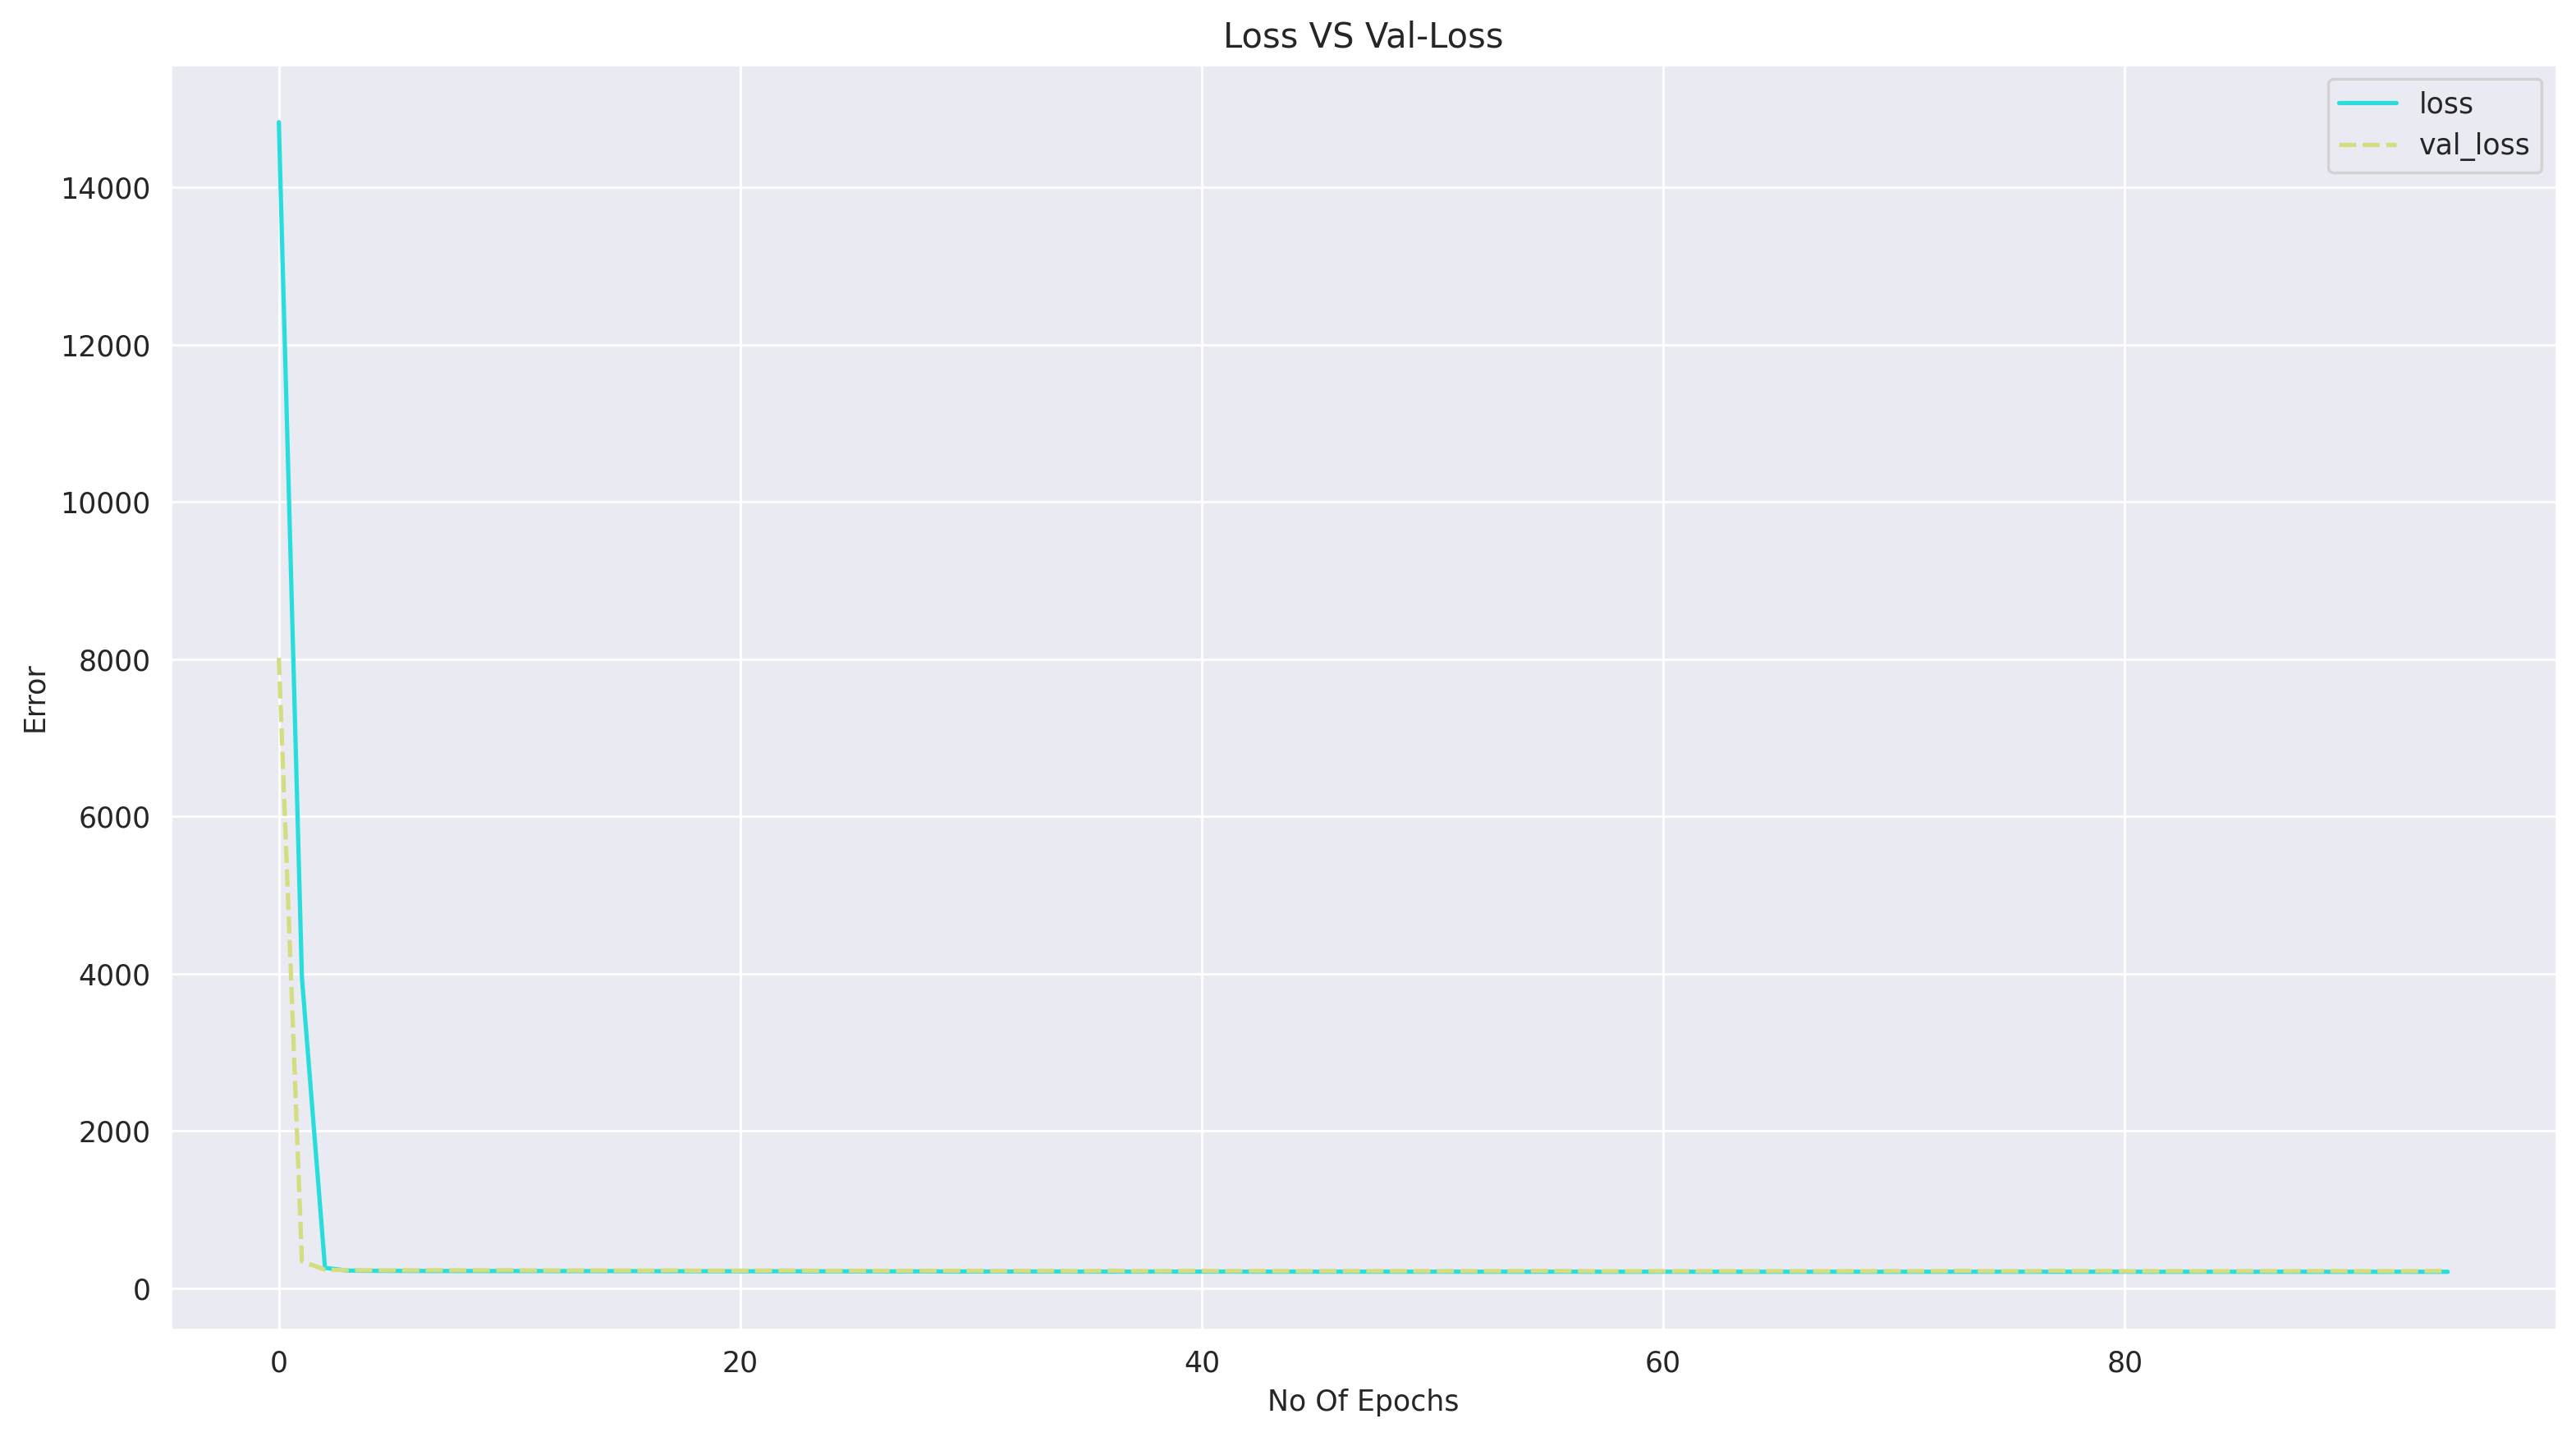

In [105]:
val_loss_es = pd.DataFrame(ann_es.history.history)

sns.lineplot(data = val_loss_es, palette='rainbow')
plt.title('Loss VS Val-Loss')
plt.ylabel('Error')
plt.xlabel('No Of Epochs')

# Creating Model With Drop Out Layer
# **Creating ANN Model**

In [106]:
ann_dol =Sequential()

# Creating Hidden Layer

In [107]:
ann_dol.add(Dense(units=30, activation='linear'))
ann_dol.add(Dropout(rate=0.5))

ann_dol.add(Dense(units=20, activation='relu'))
ann_dol.add(Dropout(rate=0.5))

# Creating Output Layer

In [108]:
ann_dol.add(Dense(units=1))

# Connecting All Neurons In Each Layer

In [109]:
ann_dol.compile(optimizer='adam', loss='mse')

# Fitting Data

In [110]:
ann_dol.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 50)

Epoch 1/50
353/353 [==============================] - 2s 3ms/step - loss: 14644.6885 - val_loss: 6560.1465
Epoch 2/50
353/353 [==============================] - 1s 3ms/step - loss: 3909.3101 - val_loss: 733.4449
Epoch 3/50
353/353 [==============================] - 1s 3ms/step - loss: 2556.9099 - val_loss: 437.3190
Epoch 4/50
353/353 [==============================] - 1s 3ms/step - loss: 2232.5833 - val_loss: 392.0601
Epoch 5/50
353/353 [==============================] - 1s 2ms/step - loss: 2087.4915 - val_loss: 417.1887
Epoch 6/50
353/353 [==============================] - 1s 2ms/step - loss: 1997.4115 - val_loss: 372.3735
Epoch 7/50
353/353 [==============================] - 1s 2ms/step - loss: 1894.7491 - val_loss: 353.7840
Epoch 8/50
353/353 [==============================] - 1s 2ms/step - loss: 1809.4569 - val_loss: 375.5113
Epoch 9/50
353/353 [==============================] - 1s 3ms/step - loss: 1777.1611 - val_loss: 361.6191
Epoch 10/50
353/353 [==============================] 

# Evaluating The Model
**Ploting Line-Plot**

Text(0.5, 0, 'No Of Epochs')

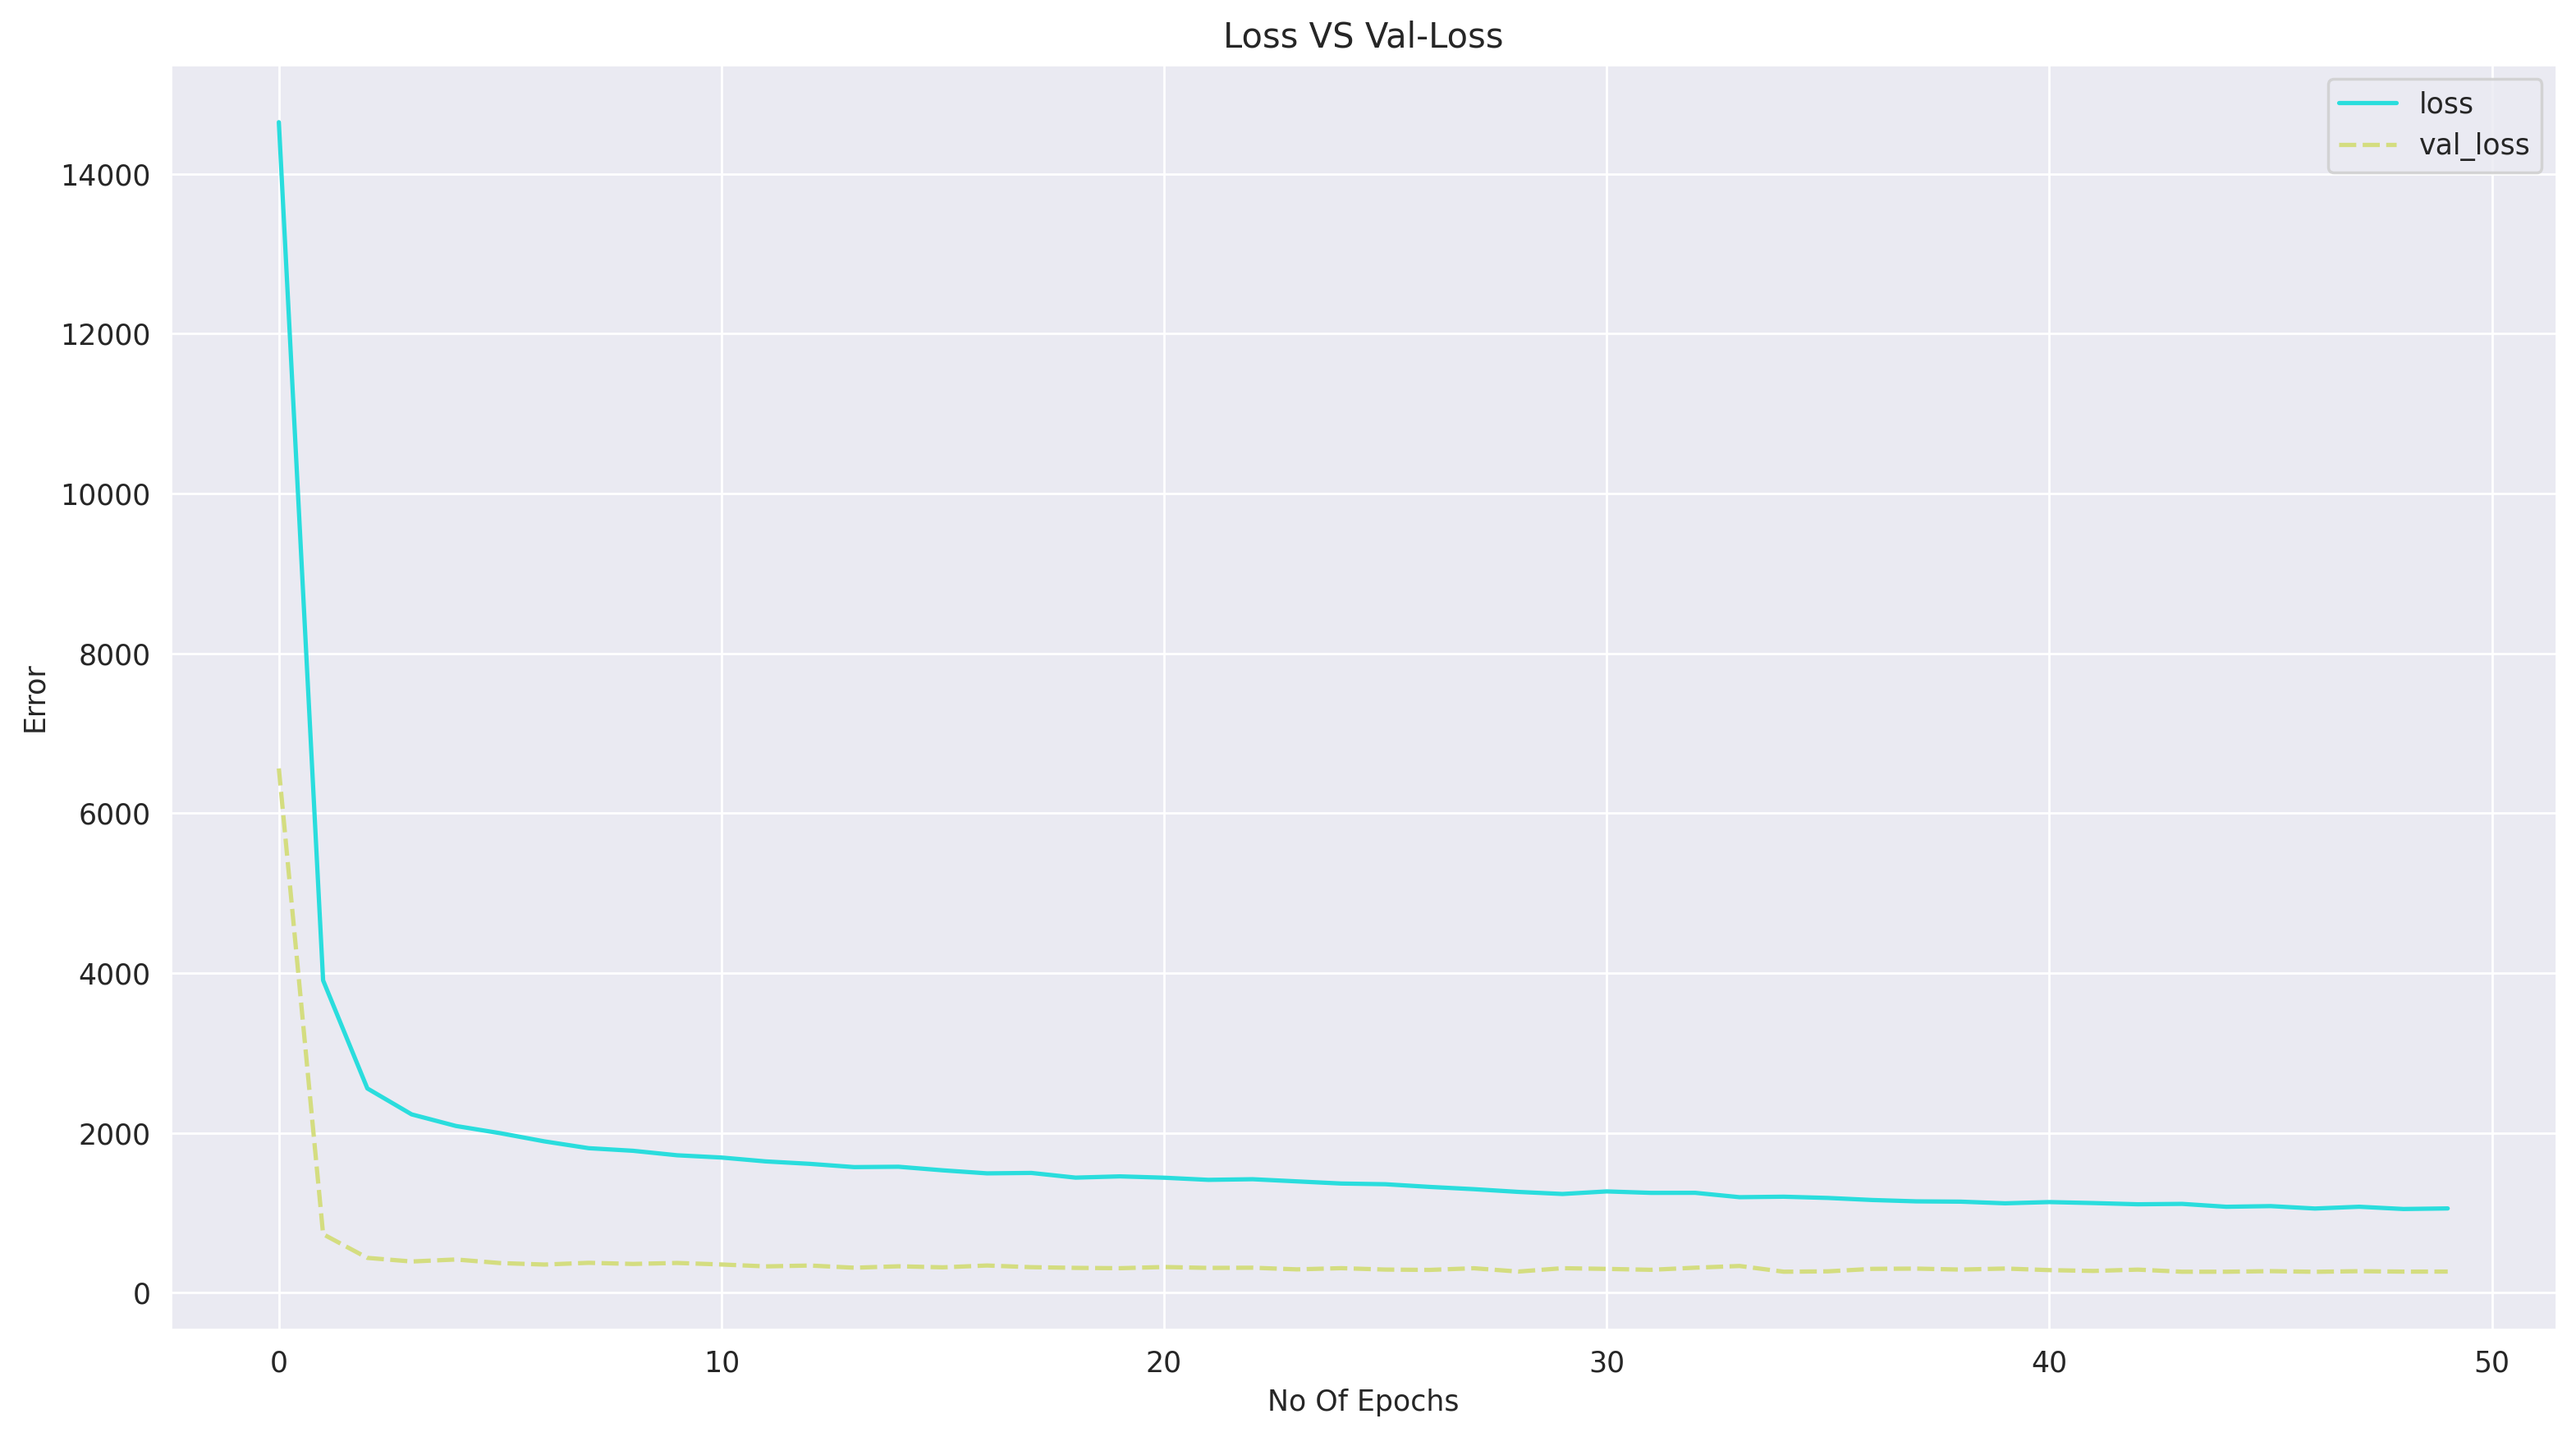

In [111]:
val_loss_dol = pd.DataFrame(ann_dol.history.history)

sns.lineplot(data = val_loss_dol, palette='rainbow')
plt.title('Loss VS Val-Loss')
plt.ylabel('Error')
plt.xlabel('No Of Epochs')

# Creating Model With Early Stopping And Drop Out Layer
Creating ann Model

In [112]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [113]:
ann_all =Sequential()

## Creating Hidden Layer

In [114]:
ann_all.add(Dense(units=30, activation='linear'))
ann_all.add(Dropout(rate=0.5))

ann_all.add(Dense(units=20, activation='relu'))
ann_all.add(Dropout(rate=0.5))

# Creating Output Layer

In [115]:
ann_all.add(Dense(units=1))

# Connecting All Neurons In Each Layer

In [116]:
ann_all.compile(optimizer='adam', loss='mse')

# Fitting Data

In [117]:
ann_all.fit(xtrain, ytrain, validation_data = (xtest, ytest), callbacks=[early] , epochs=100)

Epoch 1/100
353/353 [==============================] - 2s 2ms/step - loss: 15578.3828 - val_loss: 8722.3320
Epoch 2/100
353/353 [==============================] - 1s 2ms/step - loss: 5134.2837 - val_loss: 763.8538
Epoch 3/100
353/353 [==============================] - 1s 2ms/step - loss: 2791.6829 - val_loss: 469.3326
Epoch 4/100
353/353 [==============================] - 1s 2ms/step - loss: 2320.7478 - val_loss: 364.8501
Epoch 5/100
353/353 [==============================] - 1s 3ms/step - loss: 2078.4766 - val_loss: 371.2924
Epoch 6/100
353/353 [==============================] - 1s 2ms/step - loss: 1923.7085 - val_loss: 367.7359
Epoch 7/100
353/353 [==============================] - 1s 2ms/step - loss: 1856.0936 - val_loss: 353.9878
Epoch 8/100
353/353 [==============================] - 1s 2ms/step - loss: 1777.0070 - val_loss: 332.1048
Epoch 9/100
353/353 [==============================] - 1s 3ms/step - loss: 1757.2153 - val_loss: 368.6616
Epoch 10/100
353/353 [======================

# Evaluating The Model
**Ploting Line-Plot**

Text(0.5, 0, 'No Of Epochs')

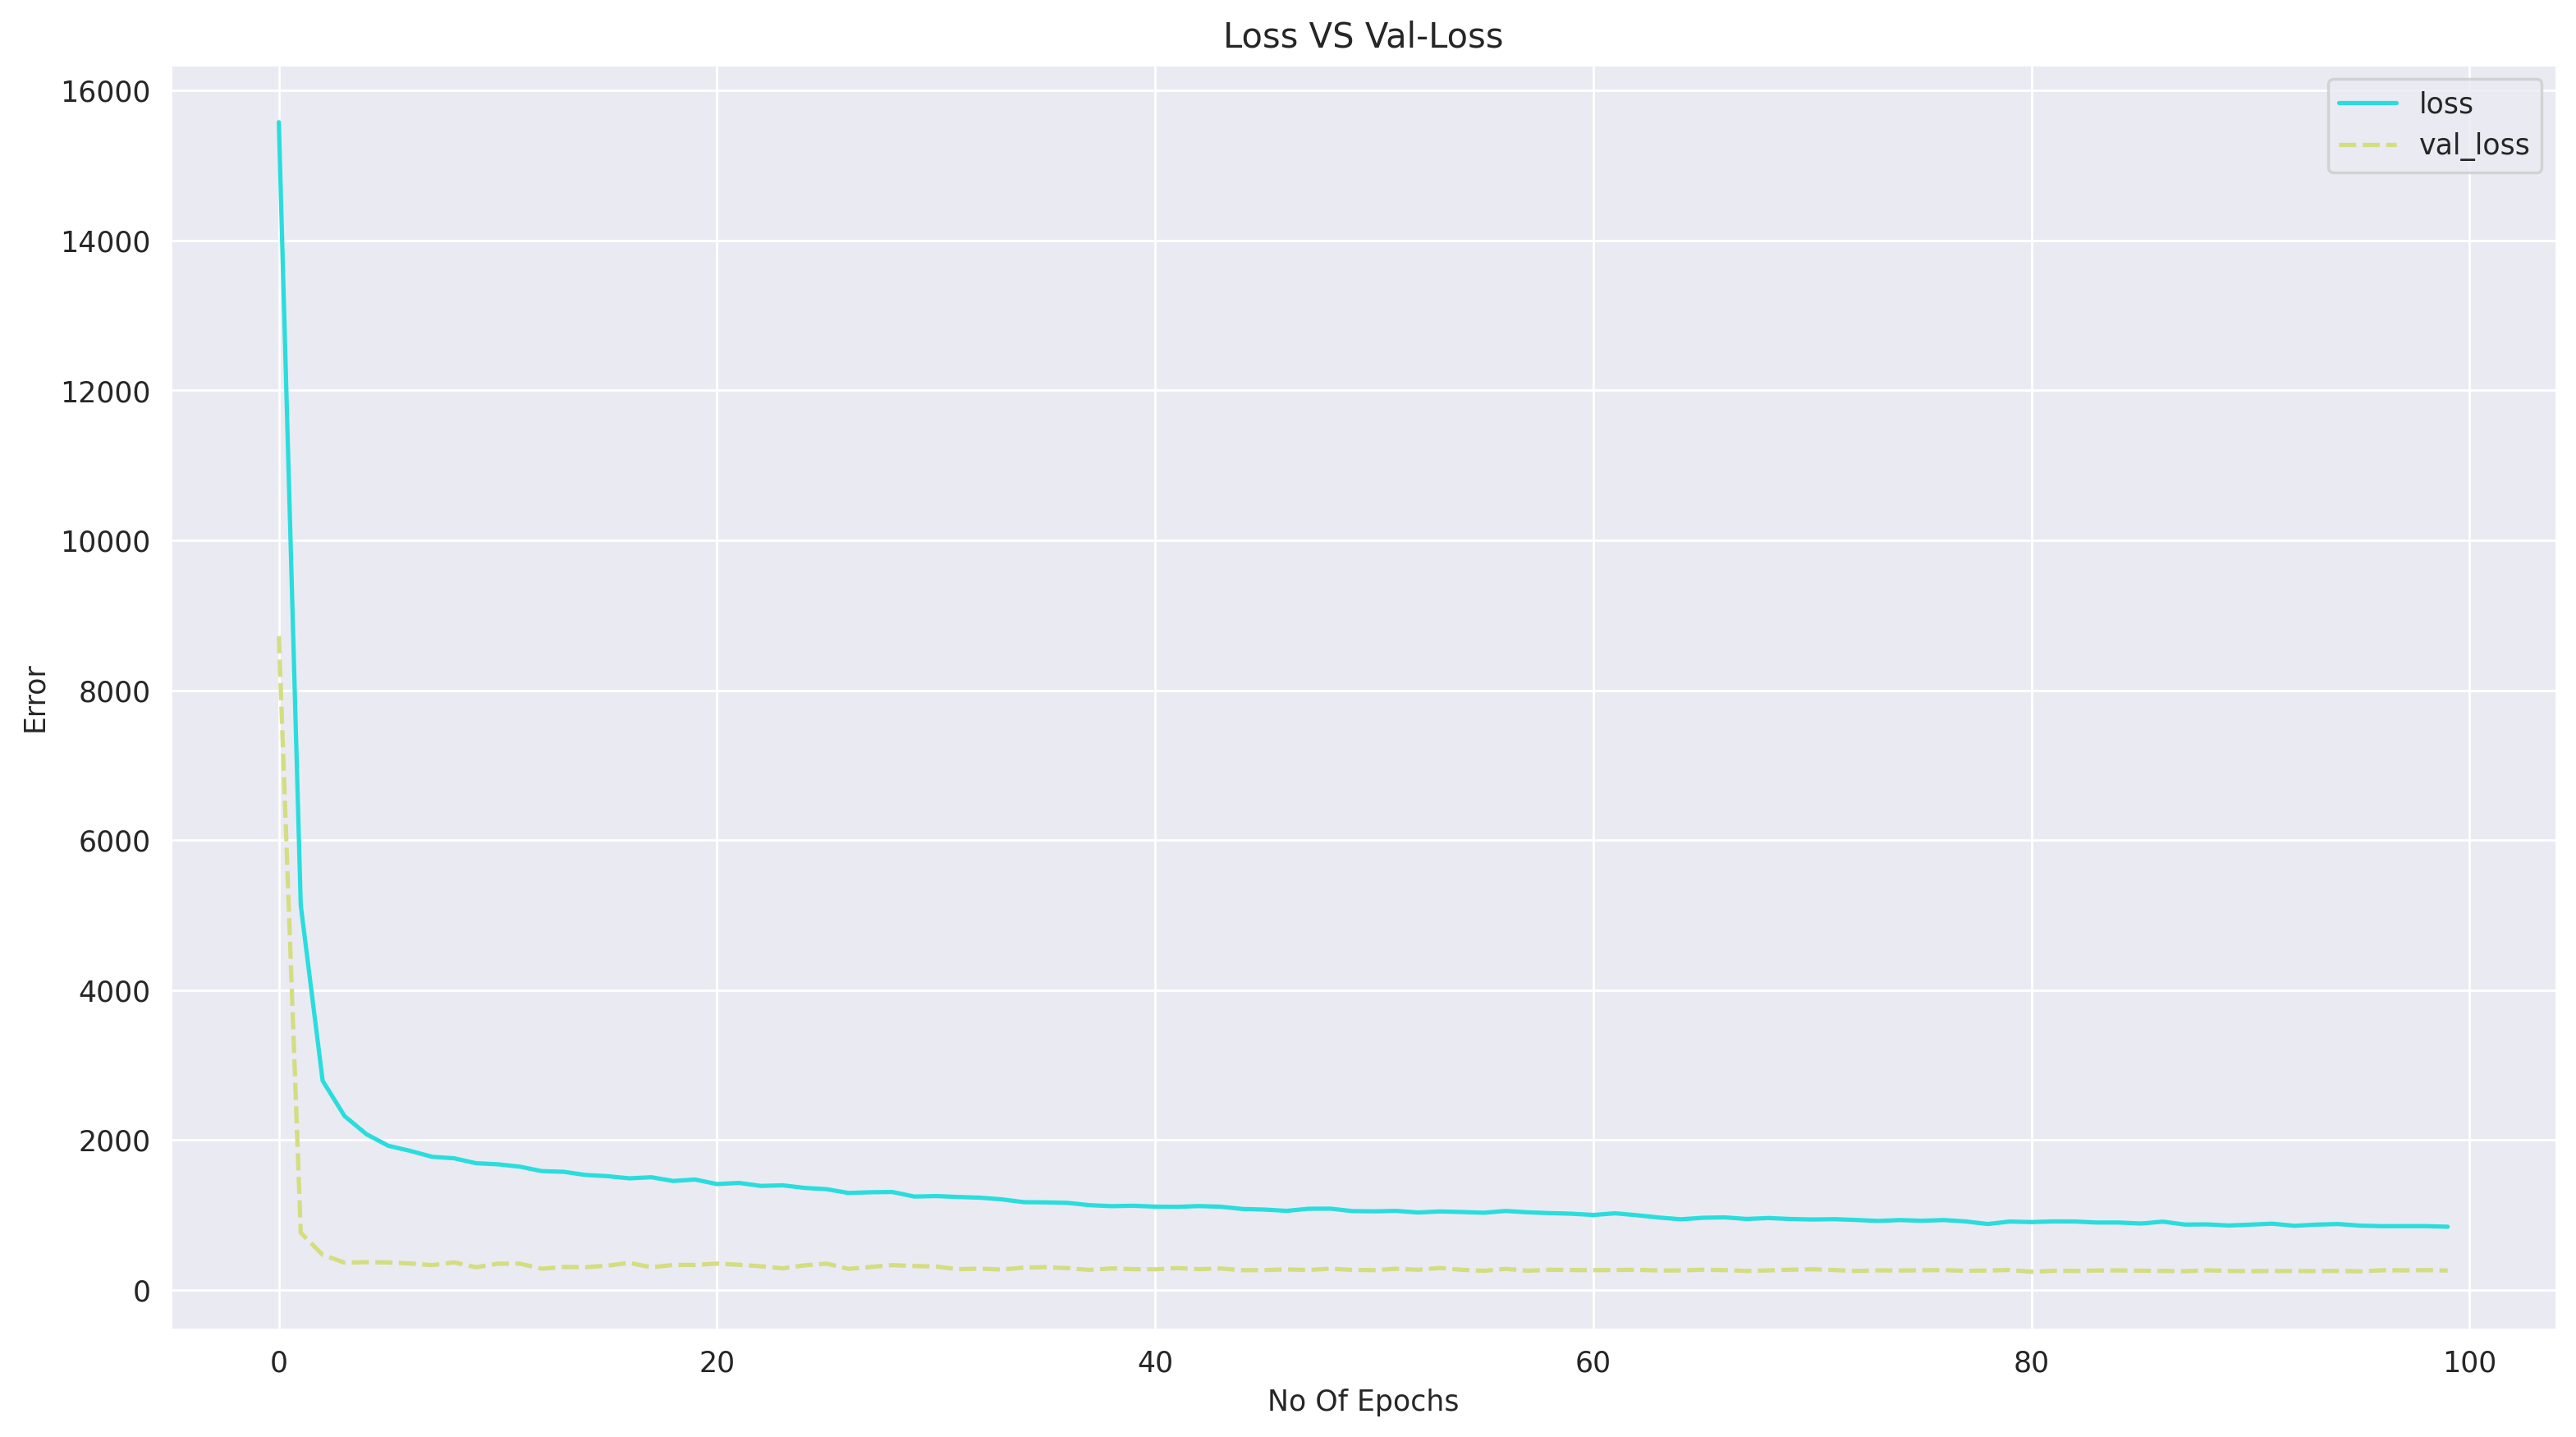

In [118]:
val_loss_all = pd.DataFrame(ann_all.history.history)

sns.lineplot(data = val_loss_all, palette='rainbow')
plt.title('Loss VS Val-Loss')
plt.ylabel('Error')
plt.xlabel('No Of Epochs')

# Compairing All Model

<Axes: title={'center': 'Model With Early Stop And Drop Out Layer'}>

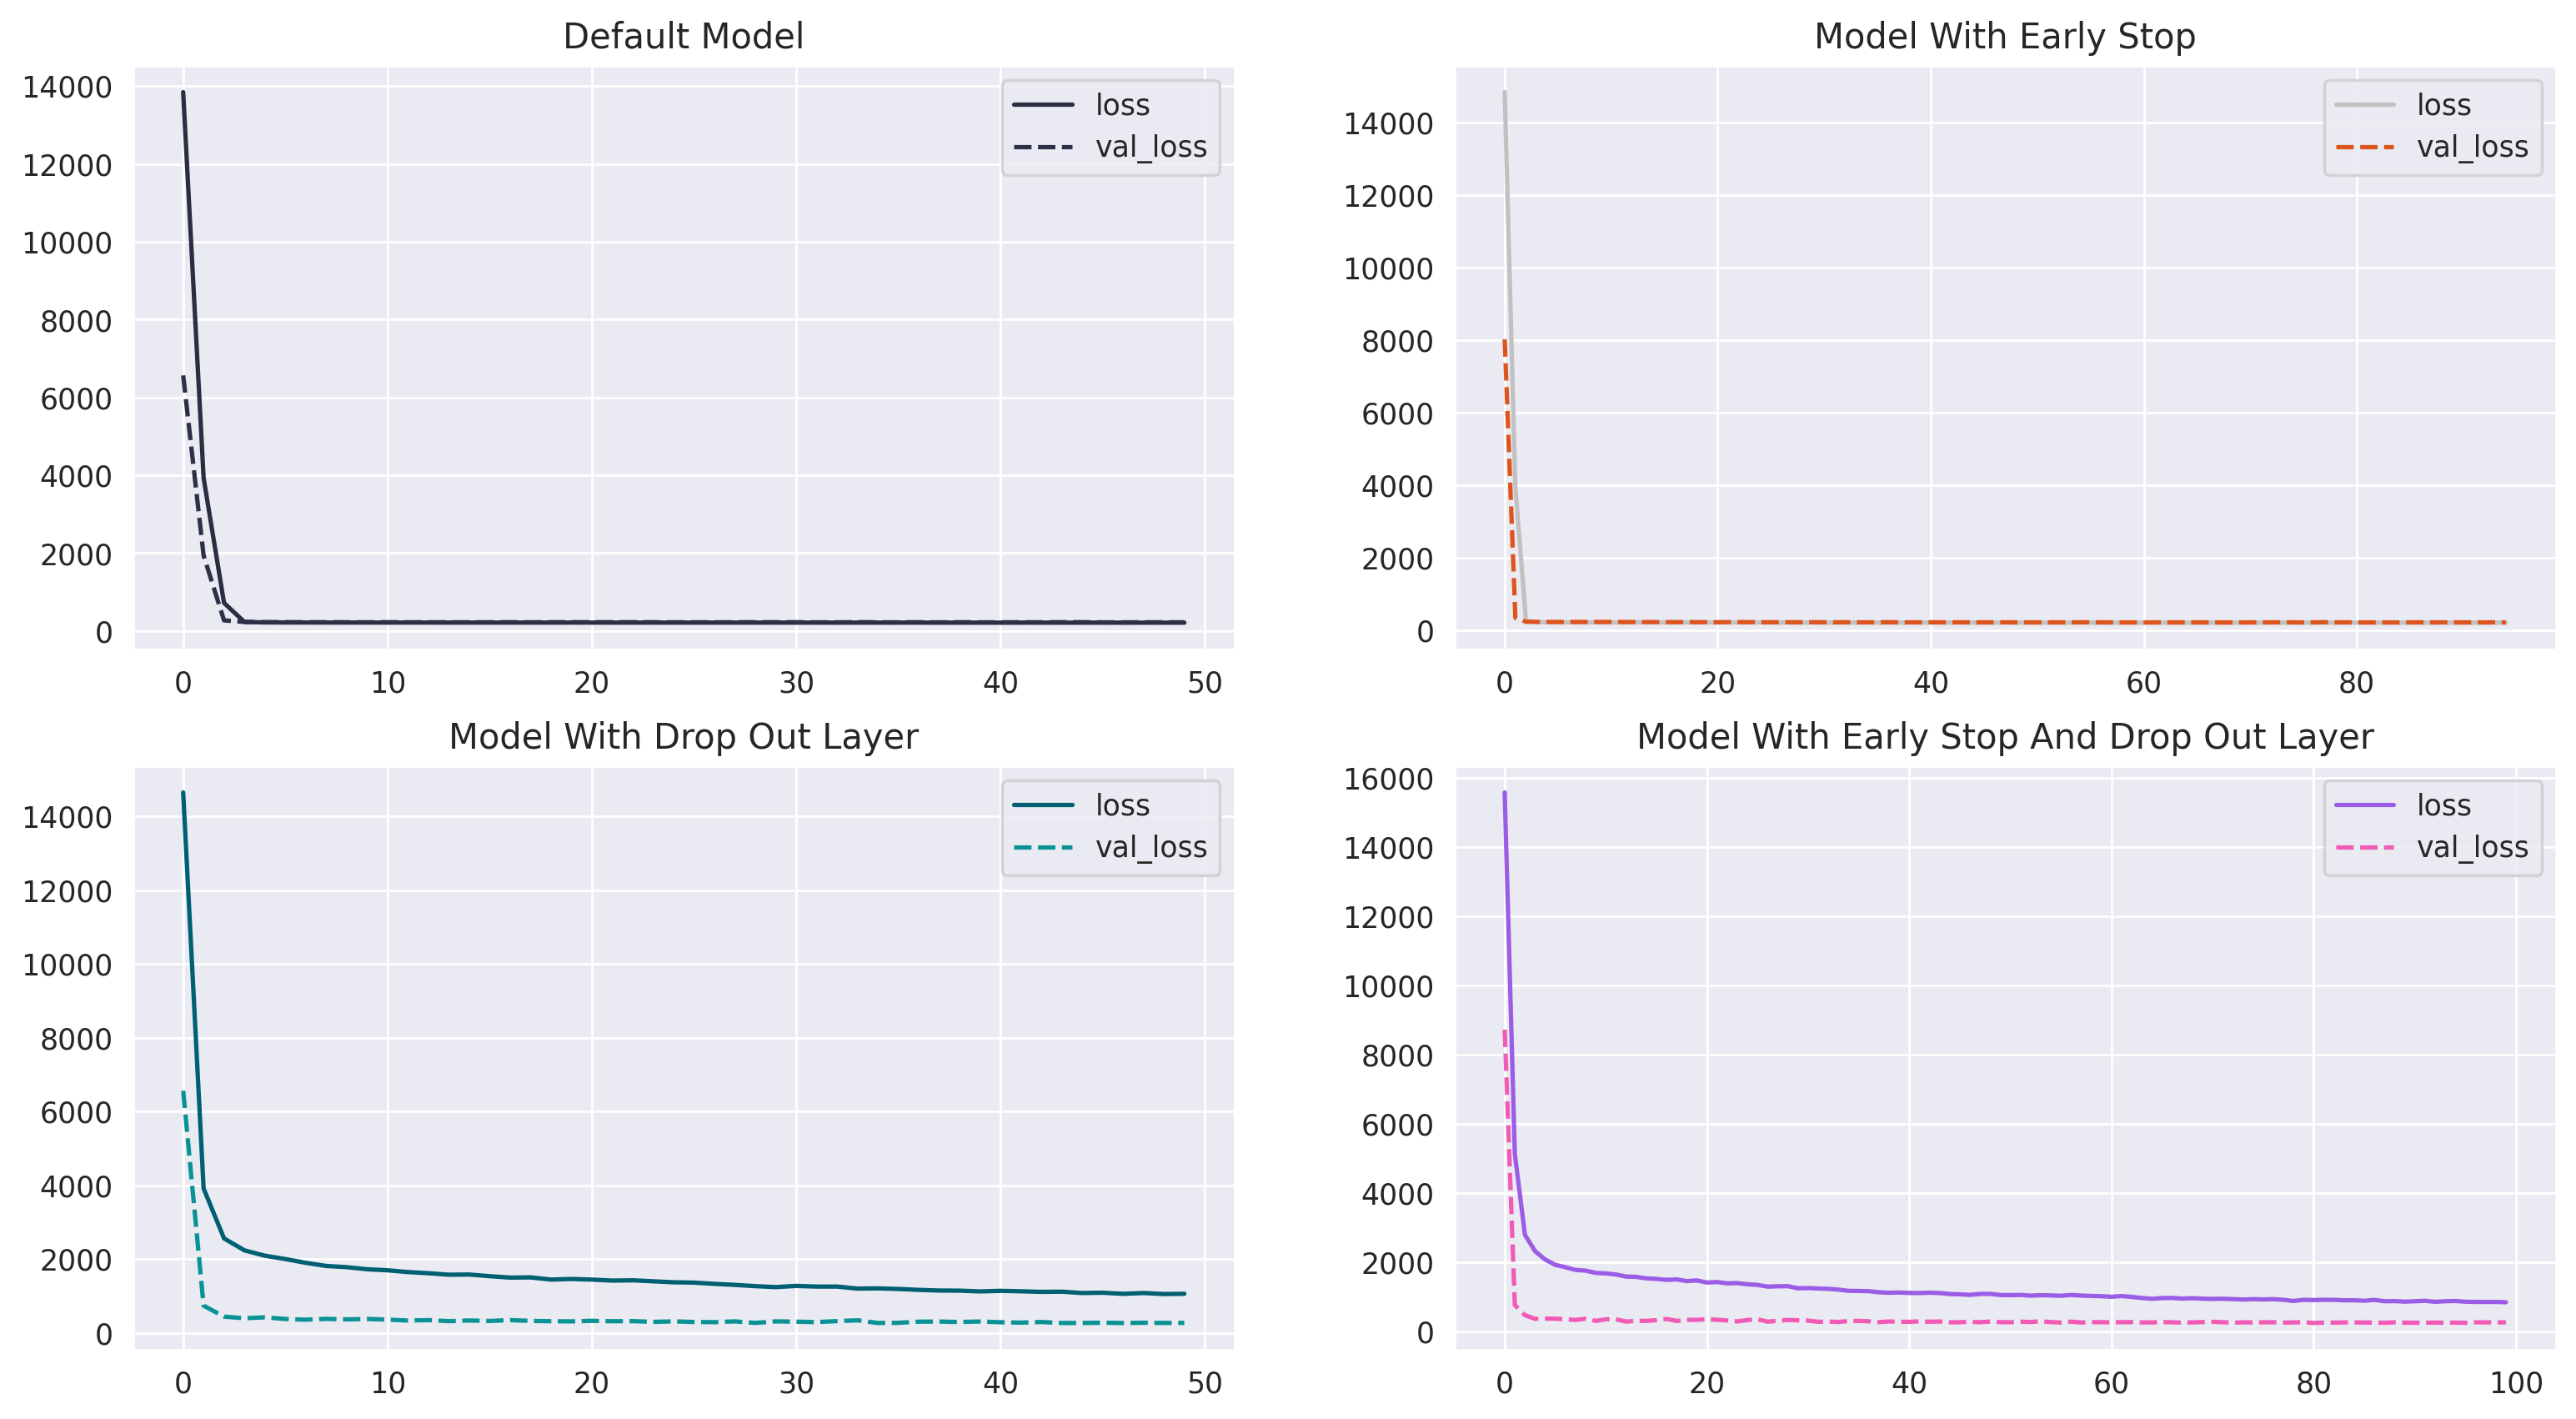

In [119]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].title.set_text('Default Model')
sns.lineplot(data=val_loss_def, ax = ax[0, 0], palette = ['#2b2d42', '#2d3047'])

ax[0, 1].title.set_text('Model With Early Stop')
sns.lineplot(data=val_loss_es, ax = ax[0, 1], palette = ['#c2c1c2', '#de541e'])

ax[1, 0].title.set_text('Model With Drop Out Layer')
sns.lineplot(data=val_loss_dol, ax = ax[1, 0], palette = ['#005f73', '#0a9396'])

ax[1, 1].title.set_text('Model With Early Stop And Drop Out Layer')
sns.lineplot(data=val_loss_all, ax = ax[1, 1], palette = [ '#9b5de5', '#f15bb5'])